<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing sale price (Part 1 of 2)

## Problem Statement:

Create a regression model based on the _**Ames Housing Dataset**_. This model will predict the price of a house at sale. <br><br>
Using this model, I would develop a web application where homeowners who wish to sell their property can use to find out what `SalePrice` to sell their property for. The website will have specific fields for visitors to fill and submit details about their property. Using our proprietary machine learning algorithm, the website will generate an estimate visitors can use as reference to quote their property `SalePrice`. <br><br>
**Target audience:** Property listing Proptech companies e.g. PropertyGuru, OhMyHome, SRX

### Contents:
* [Background](#Background)
* [Data Dictionary](#Data-Dictionary)
* [Data Import, Validation & Cleaning](#Data-Import,-Validation-and-Cleaning)  
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [Identifying Outliers](#Identifying-outliers:)
    * [Yes/No feature engineering](#Functions-for-label-encoding-presence/absence-of-attribute:)
    * [Ordinal labelling](#Functions-for-ordinal-label-encoding-of-attributes:)
    * [Value count, grouping](#Value-count-and-grouping-values-in-categorical-features:)
    * [Dummify](#train_dum)
    * [Drop outliers](#train_drop)
* [DataFrame for model](#Final-dataframe-before-feeding-to-model:)

## Processed Dataframes: 
---

* [Train Data](#train_df)
* [Dummified Train Data](#train_dum)
* [Dropped rows Train Data](#train_drop)
* [No outliers Train Data](#train_df1)

## Background
---

Project 2 involves using a well-known _**Ames housing data**_ to create a regression model that predicts the price of houses in Ames, IA. The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 75 features relating to houses. I am allowed to use any and all features that are present in this dataset. <br><br> This is also a [Kaggle challenge](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/overview), so I would need to make at least one submission towards this regression challenge. Kaggle leaderboard standings will be determined by root mean squared error (`RMSE`).

### Data provided
There are 3 datasets included in the [`datasets`](datasets/) folder for this project.
* [`sample_sub_reg.csv`](datasets/sample_sub_reg.csv): An example of a correctly formatted submission for this challenge (with a random number provided as predictions for `SalePrice`). My submission to Kaggle must match this format
* [`test.csv`](datasets/test.csv): Contains the test data for my model. This data is fed into my regression model to make predictions. Target variable (`SalePrice`) is excluded from this data.
* [`train.csv`](datasets/train.csv): Contains all of the training data for my model. 

### Goal
To predict the Sale Price for each house. For each Id in the test set, I must predict the value of the SalePrice.

## Data Dictionary
---
[Link](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Data Import, Validation and Cleaning
---

In [1]:
# import modules for data import, cleaning, exploration
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# load data
train_df = pd.read_csv('datasets/train.csv')

### train_df

In [3]:
# check import successful
train_df.head(3)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  

[3 rows x 81 columns]

In [4]:
# to get an idea of how much data I am dealing with
print(f'train_df shape: {train_df.shape}')

train_df shape: (2051, 81)


In [5]:
train_df.describe().T

count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
BsmtFin SF 1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
BsmtFin SF 2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
Bsmt Unf SF      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
Total Bsmt SF    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
Bsmt Half Bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
Garage Cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
Garage Area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
Id                    1486.0  2.198000e+03       2930.0  
PID              535453200.0  9.071801e+08  924152030.0  
MS SubClass             50.0  7.000000e+01        190.0  
Lot Frontage            68.0  8.000000e+01        313.0  
Lot Area              9430.0  1.151350e+04     159000.0  
Overall Qual             6.0  7.000000e+00         10.0  
Overall Cond             5.0  6.000000e+00          9.0  
Year Built            1974.0  2.001000e+03       2010.0  
Year Remod/Add        1993.0  2.004000e+03       2010.0  
Mas Vnr Area             0.0  1.610000e+02       1600.0  
BsmtFin SF 1           368.0  7.337500e+02       5644.0  
BsmtFin SF 2             0.0  0.000000e+00       1474.0  
Bsmt Unf SF            

Most of the min and max values of numerical columns look reasonable. Except for `Garage Yr Blt` feature, which has a max value of 2207, which is beyond the timeframe during data collection. So likely that is a data entry error. Since this data entry error cannot be corrected(unable to access source data), this data point will be excluded from model data via **[drop_set](#drop_set)**. 

In [6]:
train_df.loc[train_df['Garage Yr Blt']>2010, ['Garage Yr Blt']]

Garage Yr Blt
1699         2207.0

In [7]:
# checking dtypes and null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
# limit rows to view for easier viewing
train_df.isnull().sum().sort_values(ascending=False)[:27]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mo Sold              0
dtype: int64

In [9]:
# show percentage of null values in columns
null_val = (train_df.isnull().sum().sort_values(ascending=False) * 100 / len(train_df))[:27]
null_val

Pool QC           99.561190
Misc Feature      96.830814
Alley             93.174061
Fence             80.497318
Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Finish      5.558264
Garage Qual        5.558264
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
BsmtFin Type 1     2.681619
Bsmt Cond          2.681619
Bsmt Qual          2.681619
Mas Vnr Area       1.072647
Mas Vnr Type       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Garage Area        0.048757
Total Bsmt SF      0.048757
Bsmt Unf SF        0.048757
BsmtFin SF 2       0.048757
BsmtFin SF 1       0.048757
Garage Cars        0.048757
Mo Sold            0.000000
dtype: float64

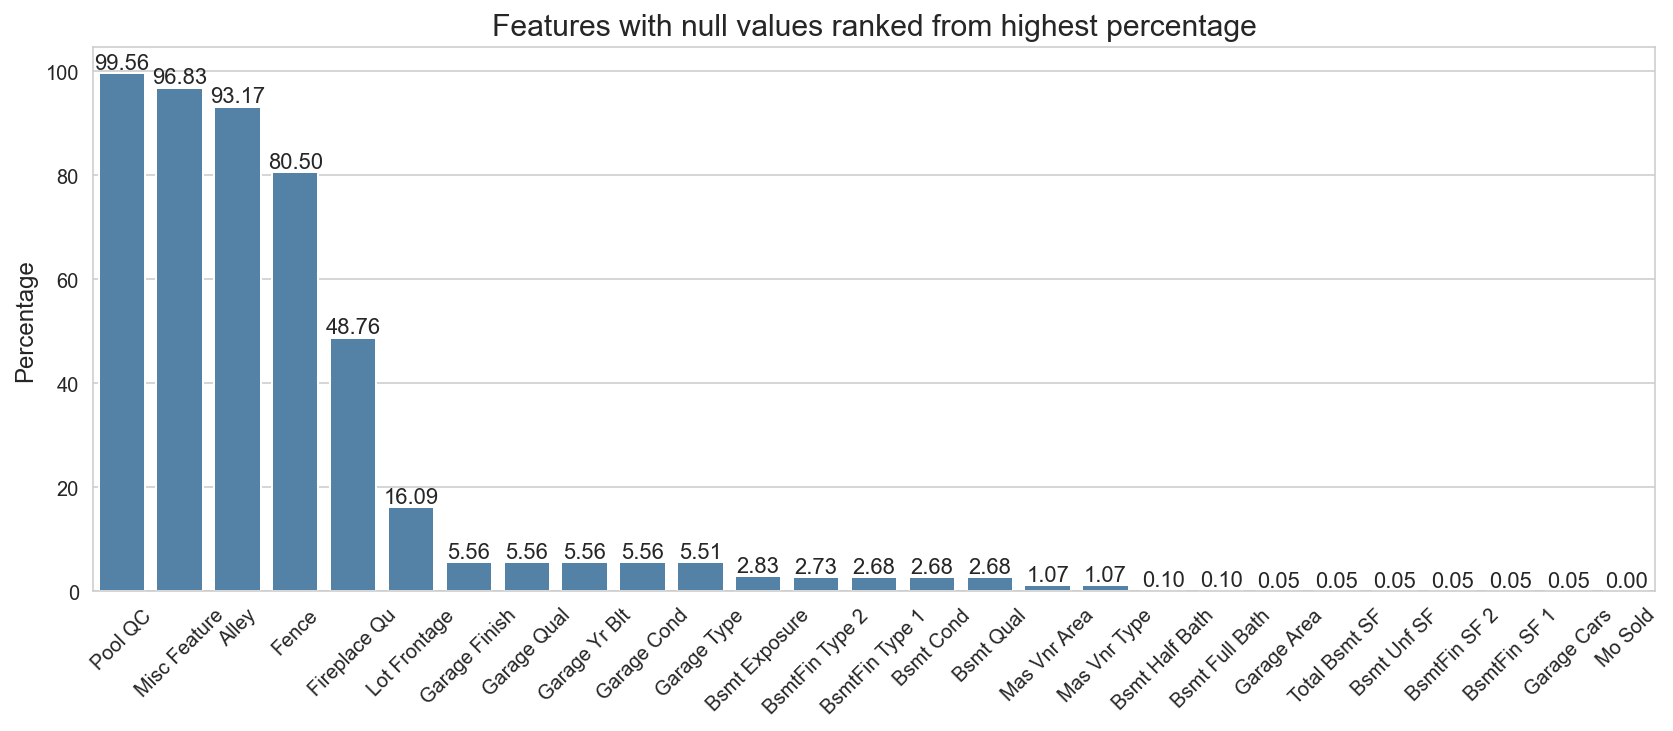

In [10]:
plt.figure(figsize=(14, 5)) # set figure size
plots = sns.barplot(x=null_val.index, y=null_val.values, color='steelblue')
plt.ylabel('Percentage', fontsize=12) # assign y-axis label

# Using Matplotlib's annotate function 
# loop through each bar in the Seaborn barplot object to set annotation
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 5),
                   textcoords='offset points')

plt.xticks(rotation=45) # rotate x-labels

# Assign plot title    
plt.title('Features with null values ranked from highest percentage', fontsize=15);

Linear regression models cannot accept any missing values, so all missing values must be dealt with before model fitting. Linear models are also greatly influenced by outliers, so outliers must be carefully identified and excluded from the model training set.<br><br>
There are 6 features that have a significant percentage of null values (`> 10%`), 5 of them are categorical, and the null values have meaning. Using `pd.get_dummies` resulted in about 230 addiional features. So I will use ordinal encoding for features labelled as ordinal in the [Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).<br><br>
The features with small percentages of null values may be related to each other. E.g. `Garage`-related, `Bsmt`-related, or `Mas Vnr`-related. I suspect that some of these may be MAR(Missing At Random) values, meaning they are dependent on the values of other features. If so, dropping the rows may be a reasonable thing to do as it would not affect many rows.<br><br>

## Exploratory Data Analysis
---

Before train-test-split, outliers need to be dealt with, especially for linear regression models. Linear regression models are easily influenced by outliers.

__Contents:__
1. [Distribution exploration](#Exploring-distributions:)
1. [Identifying outliers](#Identifying-outliers:)
1. [Ordinal label encoding](#Feature-engineering:)

For exploration of trends within the train data vs. `SalePrice` feature, I would use `train_df` (no rows and columns dropped, and no dummification), for easier comparison of the features.

## Exploring distributions:
---

Scatterplots and boxplots are useful to reveal outliers. Histogram is useful to show distribution of values, but not outliers, as outliers usually appear in low frequency, so the x-axis would be unusually long with no peak. And it would be difficult to define what is the threshold for outliers from a histogram.<br><br>
Since I am ultimately trying to predict `SalePrice`, I will be comparing features with `SalePrice`, observing for outliers and relationships.

While exploring the [Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), I realised that many of the categorical features were ordinal. Each ordinal feature has a (ordinal) label next to the feature name. <br><br> I also noticed that categorical features `Overall Qual` and `Overall Cond` already had ordinal numerical encoding where `10`=Excellent and `1`=Very poor. I used these 2 features as reference for my ordinal encoding of other categorical features.

**Numerical features for exploration are:** <br>
[`Lot Frontage`](#Lot-Frontage-distribution:); [`Lot Area`](#Lot-Area-distribution:); [`Year Built`](#Year-Built-distribution:); [`Year Remod/Add`](#Year-Remod/Add-distribution:); [`Mas Vnr Area`](#Mas-Vnr-Area-distribution:); [`BsmtFin SF 1`](#BsmtFin-SF-1-distribution:); [`BsmtFin SF 2`](#BsmtFin-SF-2-distribution:); [`Bsmt Unf SF`](#Bsmt-Unf-SF-distribution:); [`Total Bsmt SF`](#Total-Bsmt-SF-distribution:); [`1st Flr SF`](#1st-Flr-SF-distribution:); [`2nd Flr SF`](#2nd-Flr-SF-distribution:); [`Low Qual Fin SF`](#Low-Qual-Fin-SF-distribution:); [`Gr Liv Area`](#Gr-Liv-Area-distribution:); [`Bsmt Full Bath`](#Bsmt-Full-Bath-distribution:); [`Bsmt Half Bath`](#Bsmt-Half-Bath-distribution:); [`Full Bath`](#Full-Bath-distribution:); [`Half Bath`](#Half-Bath-distribution:); [`Bedroom AbvGr`](#Bedroom-AbvGr-distribution:); [`Kitchen AbvGr`](#Kitchen-AbvGr-distribution:); [`TotRms AbvGrd`](#TotRms-AbvGrd-distribution:); [`Fireplaces`](#Fireplaces-distribution:); [`Garage Cars`](#Garage-Cars-distribution:); [`Garage Area`](#Garage-Area-distribution:); [`Wood Deck SF`](#Wood-Deck-SF-distribution:); [`Open Porch SF`](#Open-Porch-SF-distribution:); [`Enclosed Porch`](#Enclosed-Porch-distribution:); [`3Ssn Porch`](#3Ssn-Porch-distribution:); [`Screen Porch`](#Screen-Porch-distribution:); [`Pool Area`](#Pool-Area-distribution:); [`Misc Val`](#Misc-Val-distribution:); [`Mo Sold`](#Mo-Sold-distribution:); [`Yr Sold`](#Yr-Sold-distribution:); [`SalePrice`](#SalePrice-distribution:)

`Garage Yr Blt` will not be explored since it would be excluded in [`train_drop`](#train_drop).

**Categorical features for exploration are:**<br>
[`MS SubClass`](#MS-SubClass-distribution:); [`MS Zoning`](#MS-Zoning-distribution:); [`Street`](#Street-distribution:); [`Alley`](#Alley-distribution:); [`Lot Shape`](#Lot-Shape-distribution:); [`Land Contour`](#Land-Contour-distribution:); [`Utilities`](#Utilities-distribution:); [`Lot Config`](#Lot-Config-distribution:); [`Land Slope`](#Land-Slope-distribution:); [`Neighborhood`](#Neighborhood-distribution:); [`Condition 1`](#Condition-1-distribution:); [`Condition 2`](#Condition-2-distribution:); [`Bldg Type`](#Bldg-Type-distribution:); [`House Style`](#House-Style-distribution:); [`Overall Qual`](#Overall-Qual-distribution:); [`Overall Cond`](#Overall-Cond-distribution:); [`Roof Style`](#Roof-Style-distribution:); [`Roof Matl`](#Roof-Matl-distribution:); [`Exterior 1st`](#Exterior-1st-distribution:); [`Exterior 2nd`](#Exterior-2nd-distribution:); [`Mas Vnr Type`](#Mas-Vnr-Type-distribution:); [`Exter Qual`](#Exter-Qual-distribution:); [`Exter Cond`](#Exter-Cond-distribution:); [`Foundation`](#Foundation-distribution:); [`Bsmt Qual`](#Bsmt-Qual-distribution:); [`Bsmt Cond`](#Bsmt-Cond-distribution:); [`Bsmt Exposure`](#Bsmt-Exposure-distribution:); [`BsmtFin Type 1`](#BsmtFin-Type-1-distribution:); [`BsmtFin Type 2`](#BsmtFin-Type-2-distribution:); [`Heating`](#Heating-distribution:); [`Heating QC`](#Heating-QC-distribution:); [`Central Air`](#Central-Air-distribution:); [`Electrical`](#Electrical-distribution:); [`Kitchen Qual`](#Kitchen-Qual-distribution:); [`Functional`](#Functional-distribution:); [`Fireplace Qu`](#Fireplace-Qu-distribution:); [`Garage Type`](#Garage-Type-distribution:); [`Garage Finish`](#Garage-Finish-distribution:); [`Garage Qual`](#Garage-Qual-distribution:); [`Garage Cond`](#Garage-Cond-distribution:); [`Paved Drive`](#Paved-Drive-distribution:); [`Pool QC`](#Pool-QC-distribution:); [`Fence`](#Fence-distribution:); [`Misc Feature`](#Misc-Feature-distribution:); [`Sale Type`](#Sale-Type-distribution:); [`Sale Condition`](#Sale-Condition-distribution:)

_**Functions for graphical visualisation:**_

In [11]:
def scatterplt(var):
    sns.scatterplot(data=train_df, x='SalePrice',y=var)
    plt.xticks([0,100000,200000,300000,400000,500000,600000],
               [0,'100k','200k','300k','400k','500k','600k']);

In [12]:
def boxplt(var,hgt,asp):
    sns.catplot(x=var,y='SalePrice', height=hgt, aspect=asp, kind='box', 
            palette=sns.color_palette(['seagreen']), data=train_df)
    plt.yticks([0,100000,200000,300000,400000,500000,600000],
           [0,'100k','200k','300k','400k','500k','600k']);

In [13]:
def boxplt_order(var,hgt,asp,order):
    sns.catplot(x=var,y='SalePrice', height=hgt, aspect=asp, order=order, kind='box', 
            palette=sns.color_palette(['seagreen']), data=train_df)
    plt.yticks([0,100000,200000,300000,400000,500000,600000],
           [0,'100k','200k','300k','400k','500k','600k']);

#### `SalePrice` distribution:

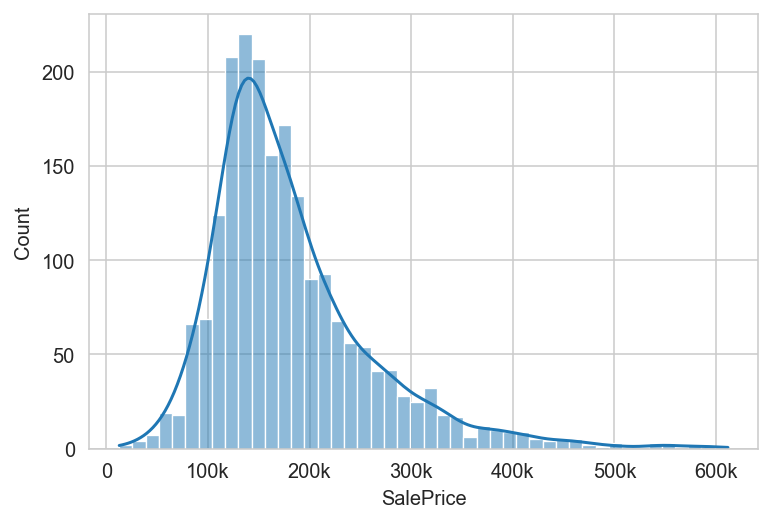

In [14]:
sns.histplot(data=train_df, x='SalePrice', kde=True)
plt.xticks([0,100000,200000,300000,400000,500000,600000],
               [0,'100k','200k','300k','400k','500k','600k']);

`SalePrice` has a right skewed distribution. Most properties have a `SalePrice` between \$100k and \$250k. The highest `SalePrice` is about \$600k. This will have an impact on the model's ability to make accurate `SalePrice` predictions for house saleprices above \$400k.

#### `MS SubClass` distribution:

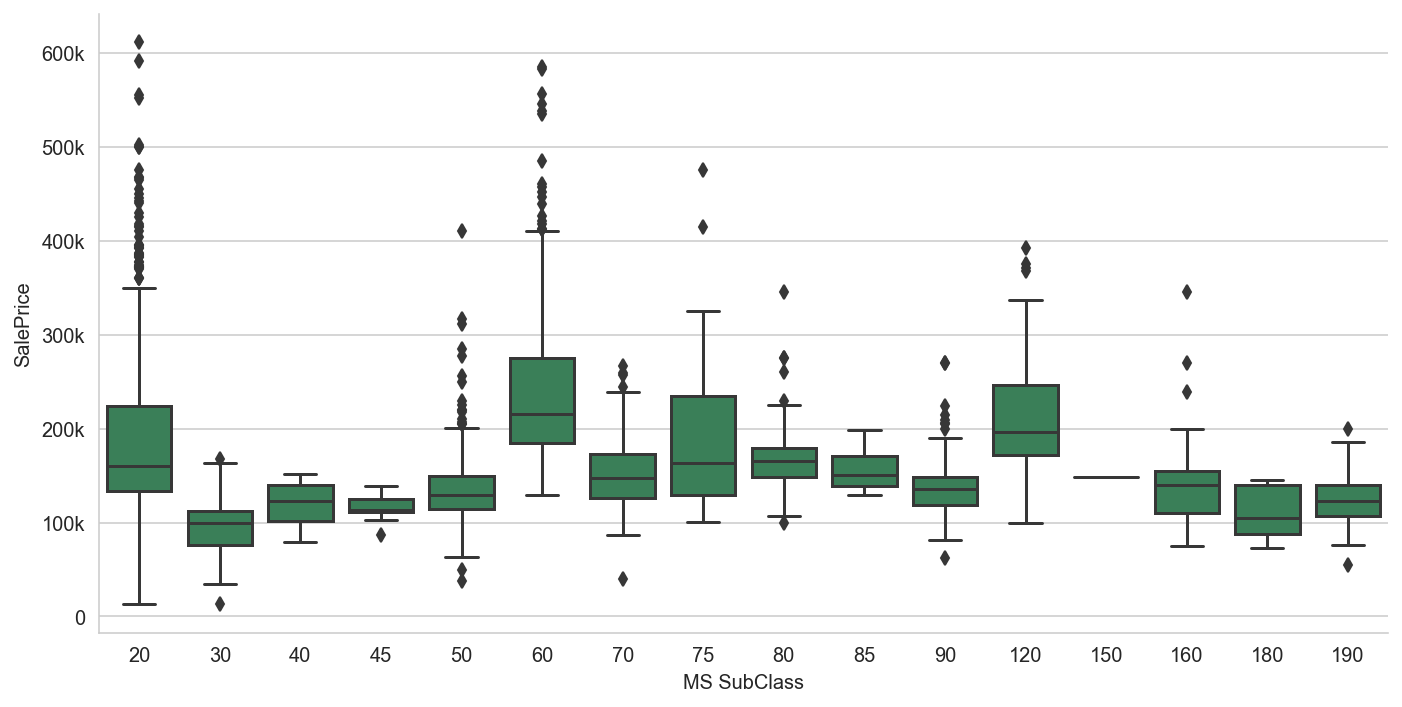

In [15]:
boxplt('MS SubClass',hgt=5,asp=2)

`MS SubClass` 20, 50 and 60 have the most outliers based on IQR. `MS SubClass` 20 and 60 are associated with higher `SalePrice`.

_Extreme outliers present:_

In [16]:
train_df.loc[(train_df['MS SubClass']==50) & (train_df['SalePrice']>400000) |
            (train_df['MS SubClass']==75) & (train_df['SalePrice']>400000) |
            (train_df['MS SubClass']==80) & (train_df['SalePrice']>300000) |
            (train_df['MS SubClass']==160) & (train_df['SalePrice']>300000), 
            ['MS SubClass', 'SalePrice']]

MS SubClass  SalePrice
519           160     345000
1035           75     475000
1304           80     345000
1389           50     410000
1897           75     415000

#### `MS Zoning` distribution:

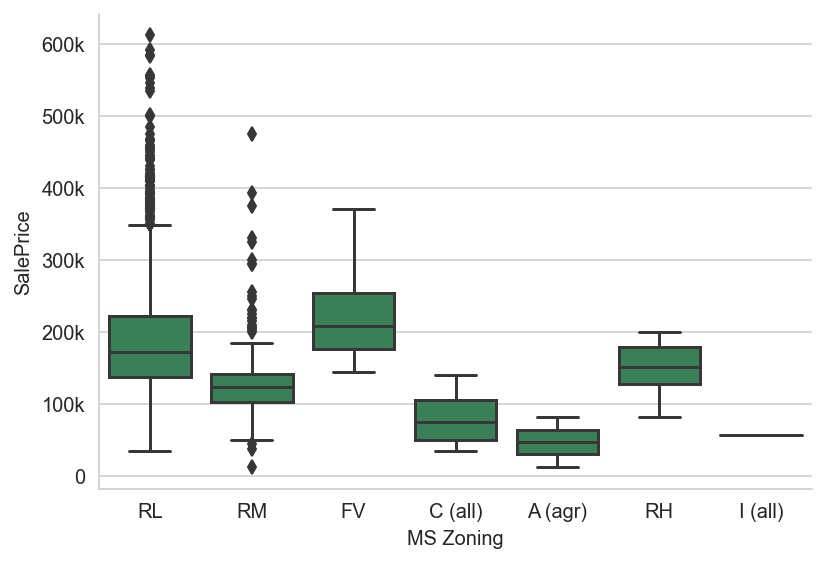

In [17]:
boxplt('MS Zoning',hgt=4,asp=1.5) 

No extreme outliers. FV(Floating village residential), RL(Residential Low Density) and RH(Residential High Density) are associated with higher `SalePrice`.

####  `Lot Frontage` distribution:

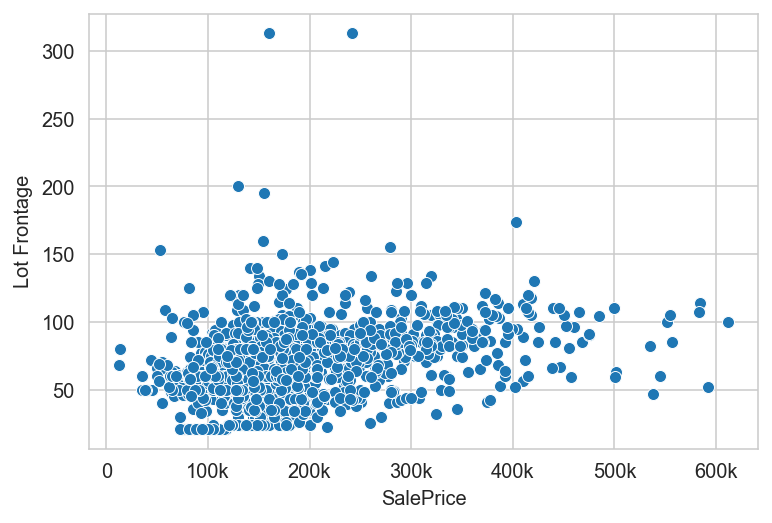

In [18]:
scatterplt(var='Lot Frontage')

_Outliers present:_

In [19]:
train_df.loc[train_df['Lot Frontage']>300, ['Lot Frontage']]

Lot Frontage
960          313.0
1335         313.0

#### `Lot Area` distribution:

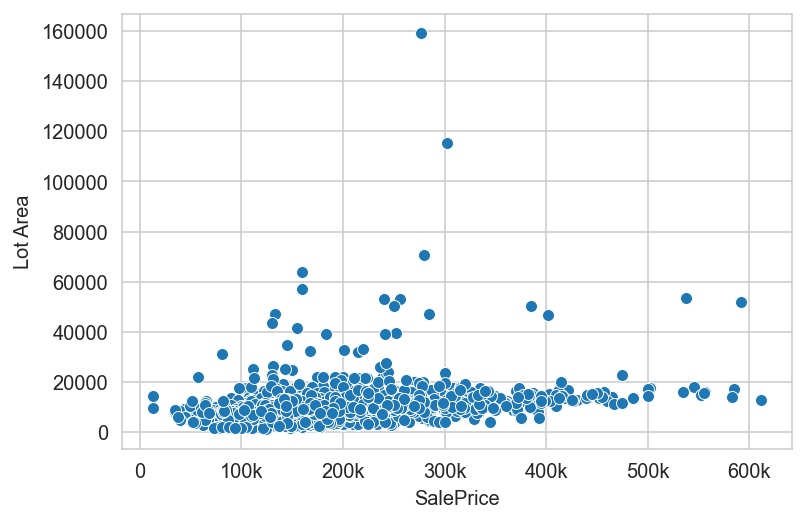

In [20]:
scatterplt(var='Lot Area')

_Outliers present:_

In [21]:
train_df.loc[train_df['Lot Area']>100000, ['Lot Area']]

Lot Area
471    159000
694    115149

#### `Street` distribution:

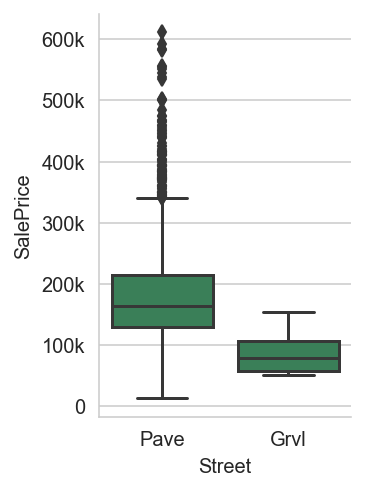

In [22]:
boxplt('Street',hgt=3.5,asp=0.8) 

No extreme outliers. Properties with Gravel street type are associated with lower `SalePrice` compared to Paved street.

#### `Alley` distribution:

In [23]:
# rename NA so that it will show on plot
train_df['Alley'].replace({np.nan:'No alley'}, inplace=True)

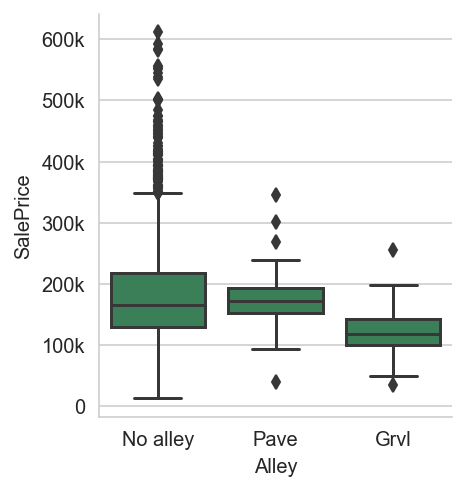

In [24]:
boxplt('Alley',hgt=3.5,asp=1) 

Having alley access or not does not seem to affect `SalePrice`. Properties with Gravel alley access are associated with slightly lower `SalePrice` tend those with Paved alley access. No extreme outliers.

#### `Lot Shape` distribution:

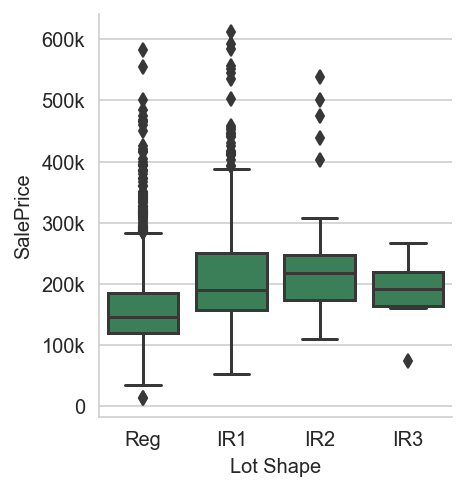

In [25]:
boxplt_order('Lot Shape',hgt=3.5,asp=1,order=['Reg','IR1','IR2','IR3'])

`Lot Shape`IR1 is associated with higher `SalePrice`.

_Extreme outlier present:_

In [26]:
train_df.loc[(train_df['Lot Shape']=='IR3') & (train_df['SalePrice']<100000), ['Lot Shape','SalePrice']]

Lot Shape  SalePrice
487       IR3      73000

#### `Land Contour` distribution:

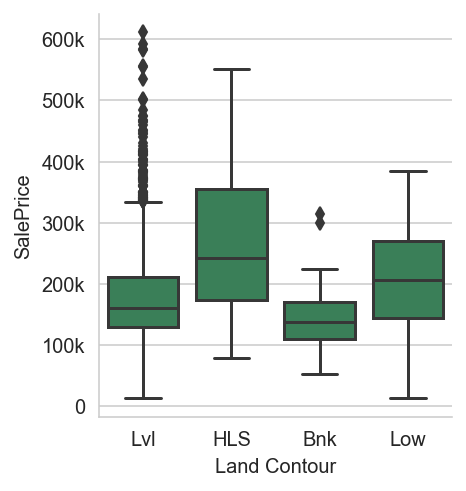

In [27]:
boxplt('Land Contour',hgt=3.5,asp=1) 

Hillside and Level `Land Contour`s are associated with higher `SalePrice`.

_Extreme outliers present:_

In [28]:
train_df.loc[(train_df['Land Contour']=='Bnk') & (train_df['SalePrice']>290000),['Land Contour','SalePrice']]

Land Contour  SalePrice
1303          Bnk     300000
1523          Bnk     315000

#### `Utilities` distribution:

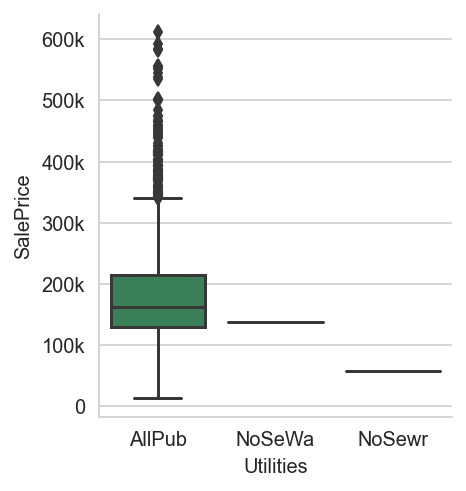

In [29]:
boxplt('Utilities',hgt=3.5,asp=1) 

Properties with all public utilities are associated with higher `SalePrice`. No extreme outliers.

#### `Lot Config` distribution:

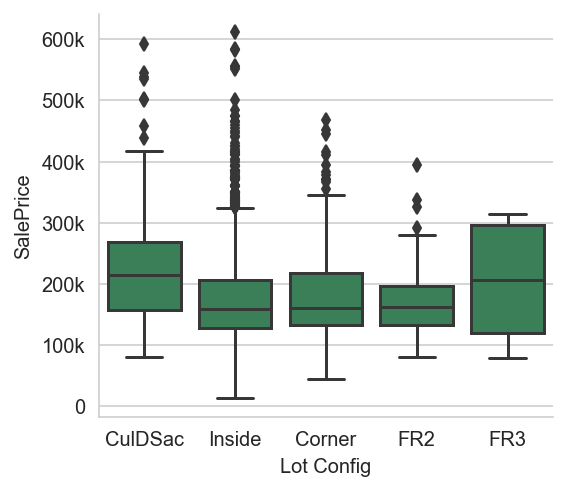

In [30]:
boxplt('Lot Config',hgt=3.5,asp=1.2) 

No extreme outliers. No obvious relationship between `Lot Config` and `SalePrice`.

#### `Land Slope` distribution:

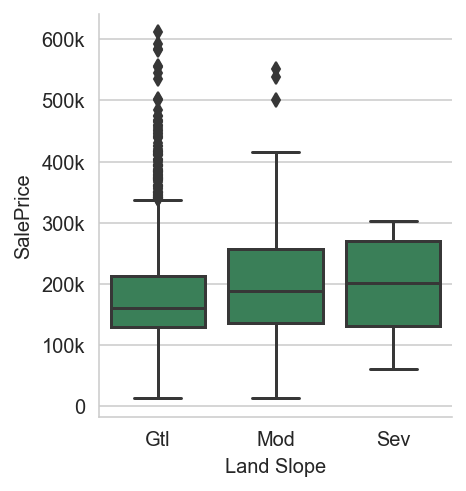

In [31]:
boxplt_order('Land Slope',hgt=3.5,asp=1,order=['Gtl','Mod','Sev']) 

No extreme outliers. Properties with gentle slope are associated with higher `SalePrice`(outliers).

#### `Neighborhood` distribution:

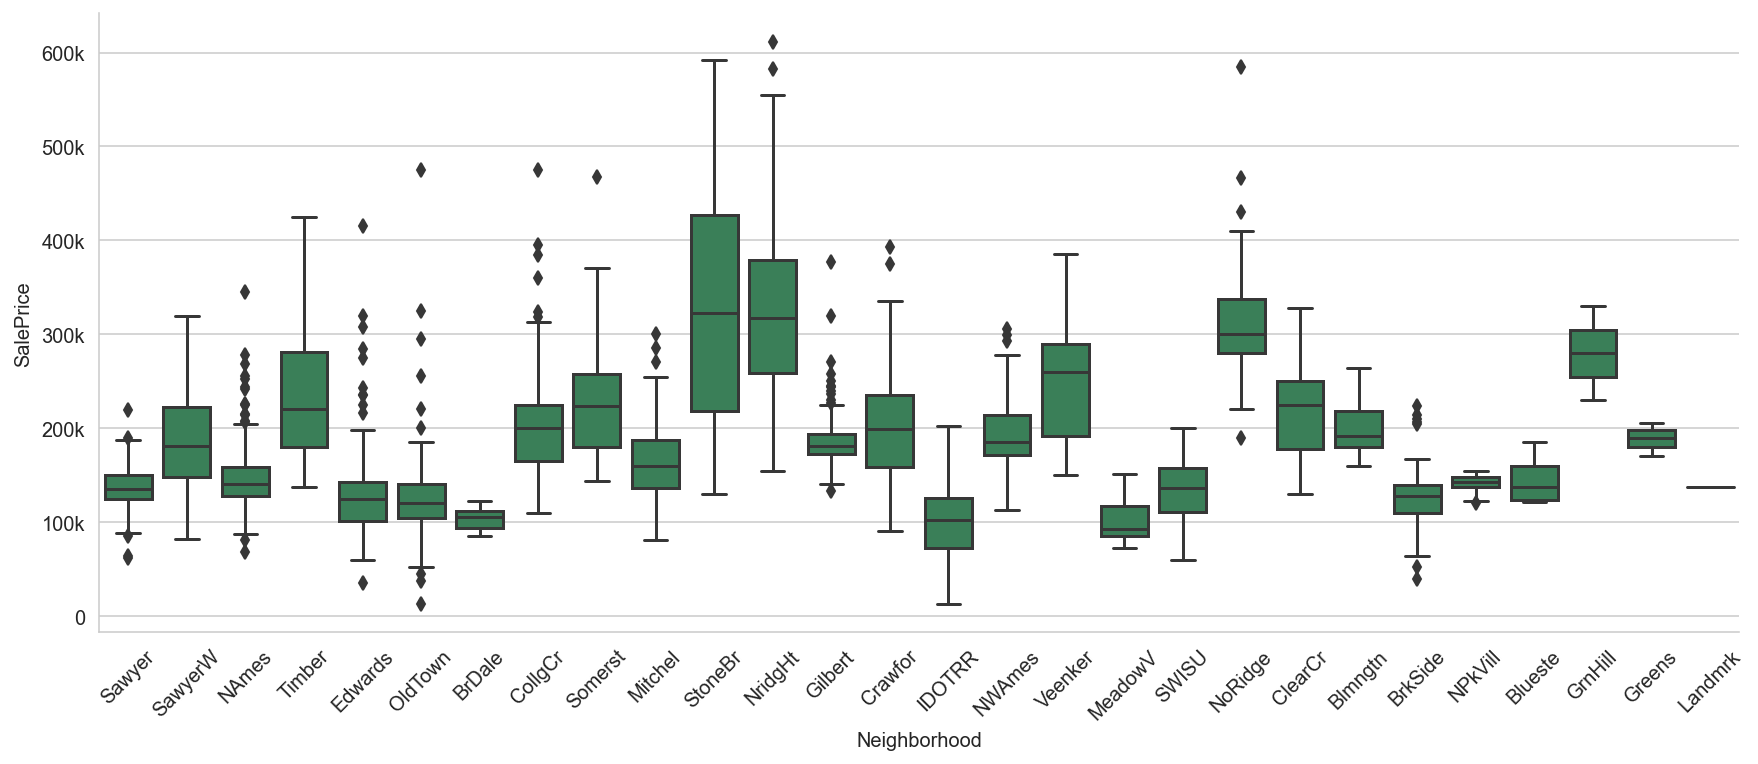

In [32]:
boxplt('Neighborhood',hgt=5,asp=2.5) 
plt.xticks(rotation=45);

Properties in Stone Brook and Northridge Heights are associated with higher `SalePrice`. 

_Extreme outliers present:_

In [33]:
train_df.loc[(train_df['Neighborhood']=='OldTown')&(train_df['SalePrice']>400000)|
            (train_df['Neighborhood']=='Somerst')&(train_df['SalePrice']>400000)|
            (train_df['Neighborhood']=='NoRidge')&(train_df['SalePrice']>500000),
            ['Neighborhood','SalePrice']]

Neighborhood  SalePrice
685       Somerst     468000
1035      OldTown     475000
1692      NoRidge     584500

#### `Condition 1` distribution:

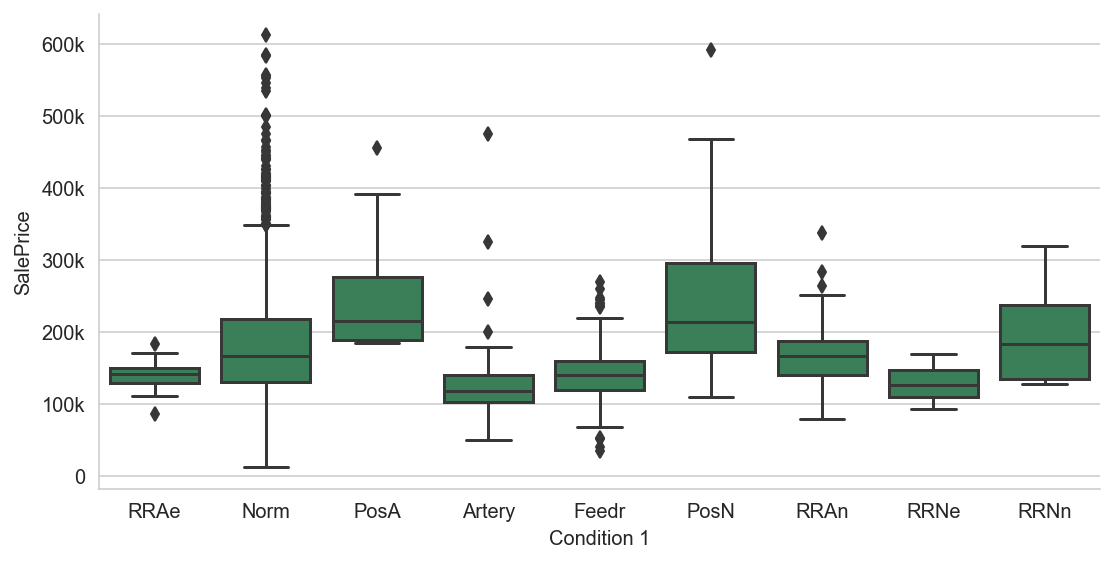

In [34]:
boxplt('Condition 1',hgt=4,asp=2) 

Properties with normal conditions, or near a positive feature are associated with higher `SalePrice`.

_Extreme outliers present:_

In [35]:
train_df.loc[(train_df['Condition 1']=='Artery')&(train_df['SalePrice']>400000)|
            (train_df['Condition 1']=='PosN')&(train_df['SalePrice']>500000), 
            ['Condition 1','SalePrice']]

Condition 1  SalePrice
1035      Artery     475000
1964        PosN     591587

#### `Condition 2` distribution:

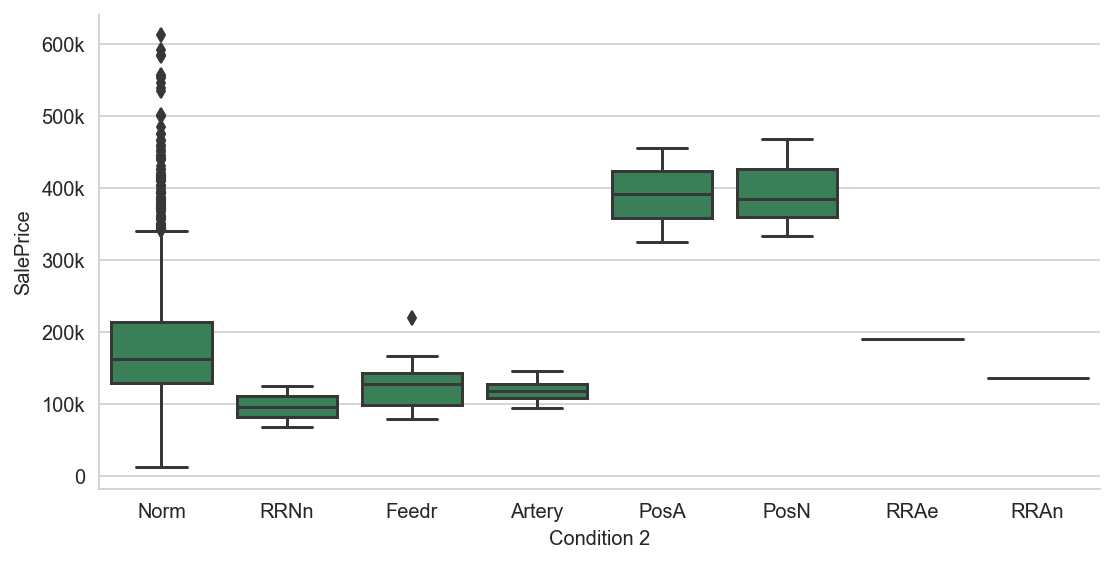

In [36]:
boxplt('Condition 2',hgt=4,asp=2) 

No extreme outliers. Properties near positive feature are associated with higher `SalePrice`.

#### `Bldg Type` distribution:

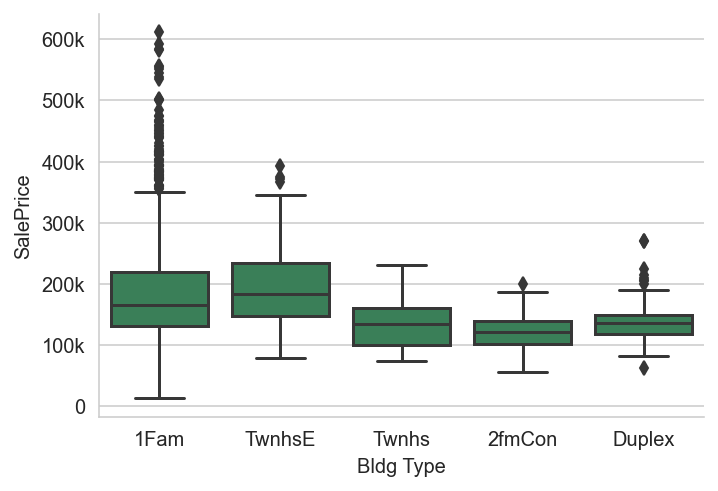

In [37]:
boxplt('Bldg Type',hgt=3.5,asp=1.5) 

No extreme outliers. Properties that are Single-family detached are associated with higher `SalePrice` (outliers).

#### `House Style` distribution:

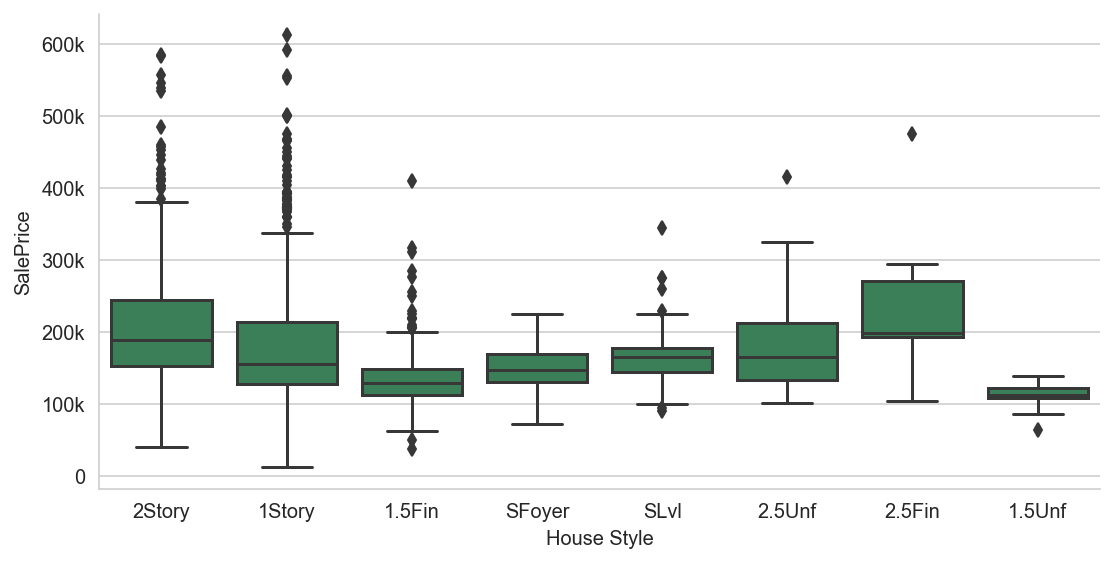

In [38]:
boxplt('House Style',hgt=4,asp=2) 

Properties with 1 or 2 stories are associated with higher `SalePrice` (outliers).

_Extreme outlier present:_

In [39]:
train_df.loc[(train_df['House Style']=='2.5Fin')&(train_df['SalePrice']>400000),
            ['House Style','SalePrice']]

House Style  SalePrice
1035      2.5Fin     475000

#### `Overall Qual` distribution:

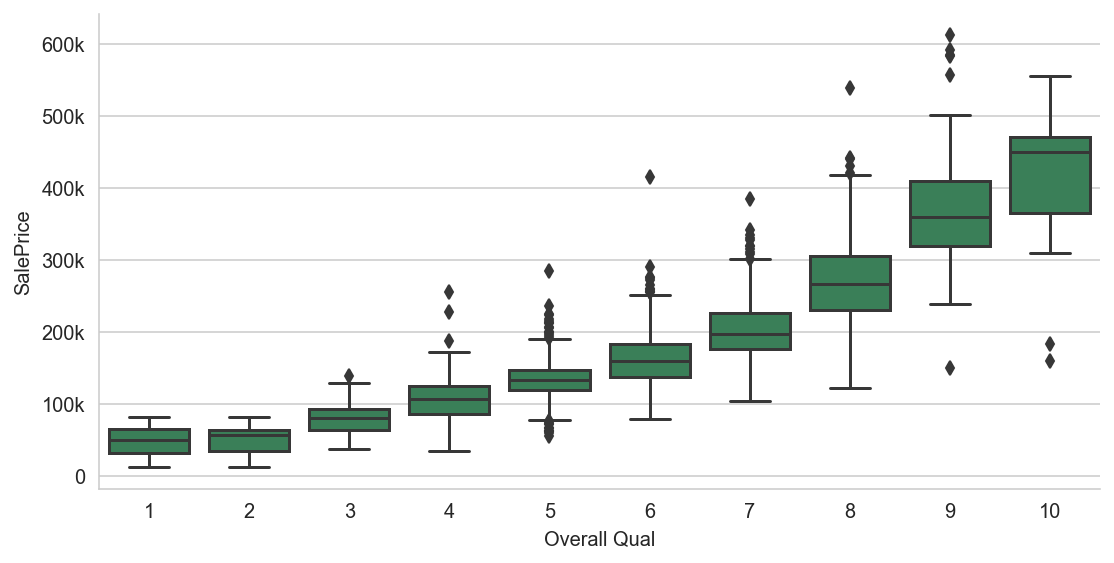

In [40]:
boxplt('Overall Qual',hgt=4,asp=2) 

There is a strong positive relationship between `Overall Qual` and `SalePrice`.

_Extreme outliers present:_

In [41]:
train_df.loc[(train_df['Overall Qual']==6)&(train_df['SalePrice']>400000)|
            (train_df['Overall Qual']==8)&(train_df['SalePrice']>500000)|
            (train_df['Overall Qual']==9)&(train_df['SalePrice']<200000)|
            (train_df['Overall Qual']==10)&(train_df['SalePrice']<200000),
            ['Overall Qual','SalePrice']]

Overall Qual  SalePrice
125              9     150000
823              8     538000
960             10     160000
1885            10     183850
1897             6     415000

#### `Overall Cond` distribution:

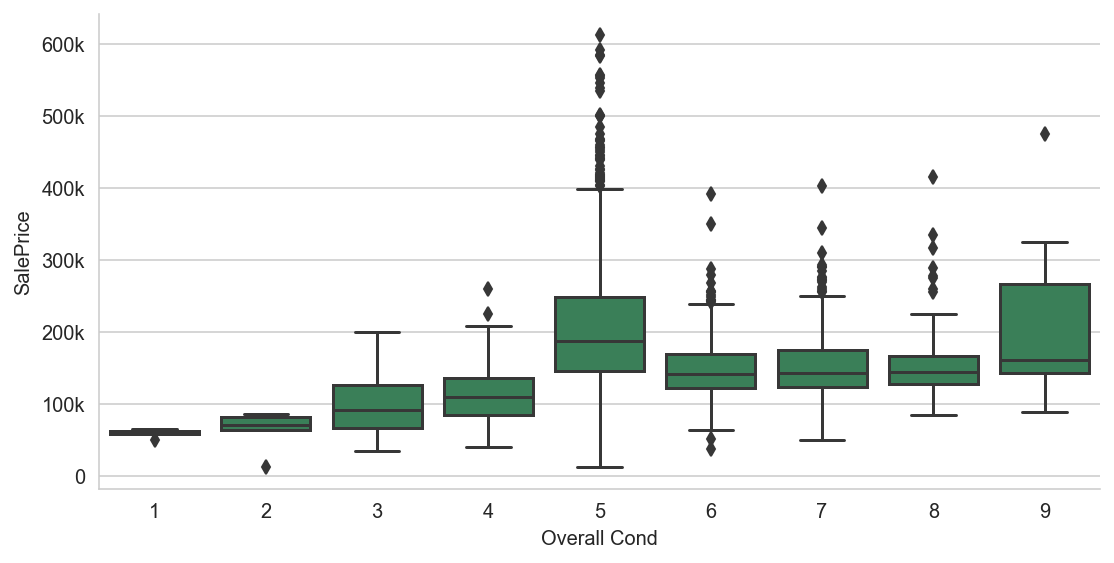

In [42]:
boxplt('Overall Cond',hgt=4,asp=2) 

Average(score=5) `Overall Cond` is associated with higher `SalePrice` (outliers).

_Extreme outlier present:_

In [43]:
train_df.loc[(train_df['Overall Cond']==9)&(train_df['SalePrice']>400000),
            ['Overall Cond','SalePrice']]

Overall Cond  SalePrice
1035             9     475000

#### Year Built distribution:

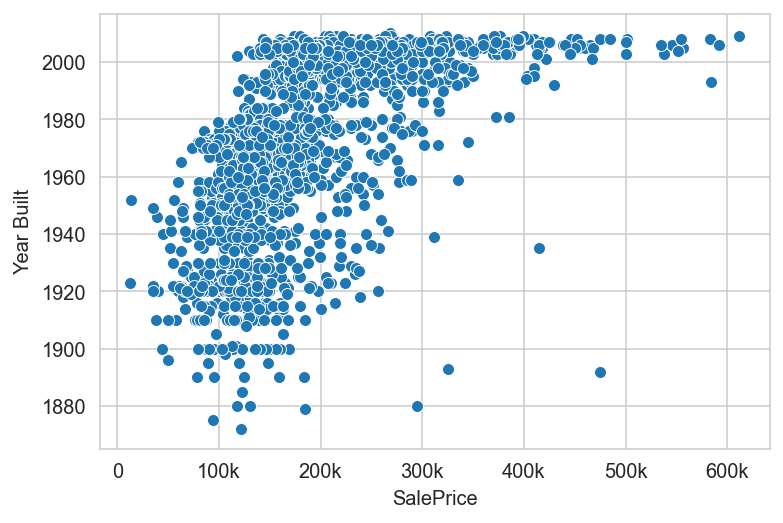

In [44]:
scatterplt(var='Year Built')

Appears to be an inverse exponential relationship between `Year Built` and `SalePrice`. Properties built before 2000 have a narrow range of `SalePrice`. While properties built after 2000 have a wide range of `SalePrice`.

_Outliers present:_

In [45]:
train_df.loc[(train_df['Year Built']<1936) & (train_df['SalePrice']>290000)]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1035  2667  902400110           75        RM          90.0     22950   Pave   
1141  1321  902401120           75        RM          75.0     13500   Pave   
1897  2738  905427030           75        RL          60.0     19800   Pave   
1939  1307  902207220           75        RM          87.0     18386   Pave   

         Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  \
1035  No alley       IR2          Lvl  ...          410         0     NaN   
1141  No alley       Reg          Lvl  ...            0         0     NaN   
1897  No alley       Reg          Lvl  ...            0         0     NaN   
1939  No alley       Reg          Lvl  ...            0         0     NaN   

      Fence Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1035  GdPrv          NaN        0       6    2006        WD      475000  
1141    NaN          NaN        0       7    2008        WD      325000  
1897    NaN          NaN        0      12    2006        WD      415000  
1939    NaN          NaN        0       5    2008        WD      295000  

[4 rows x 81 columns]

#### Year Remod/Add distribution:

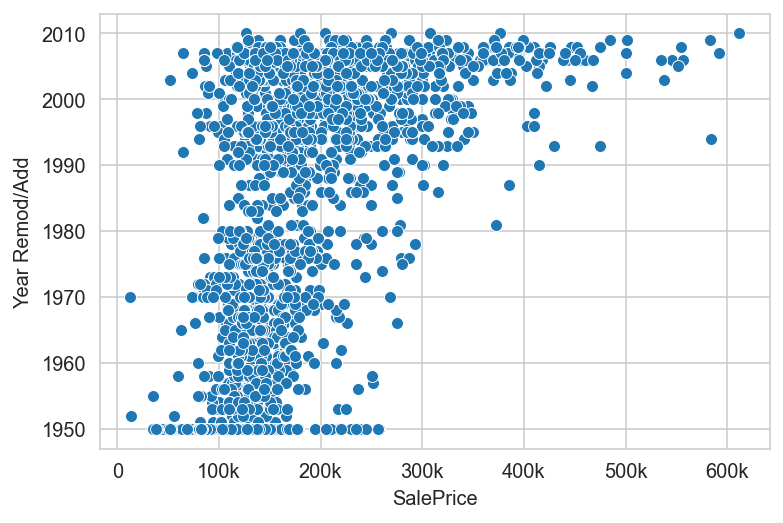

In [46]:
scatterplt(var='Year Remod/Add')

_No gross outliers._

#### `Roof Style` distribution:

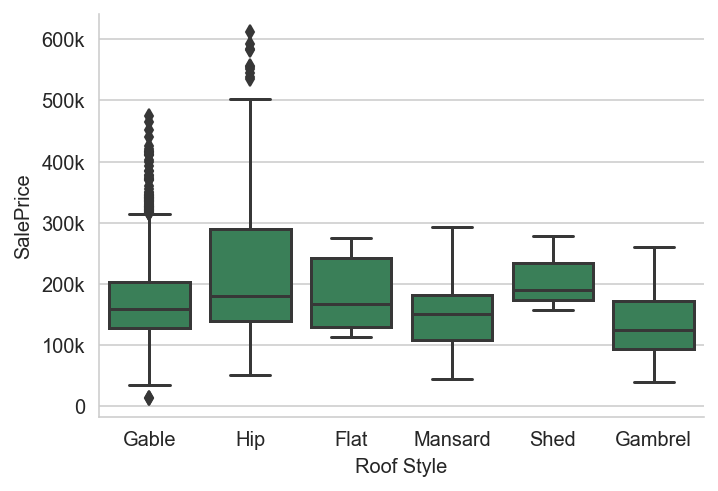

In [47]:
boxplt('Roof Style',hgt=3.5,asp=1.5) 

Hip `Roof Style` is associated with higher `SalePrice`(outliers). No extreme outliers.

#### `Roof Matl` distribution:

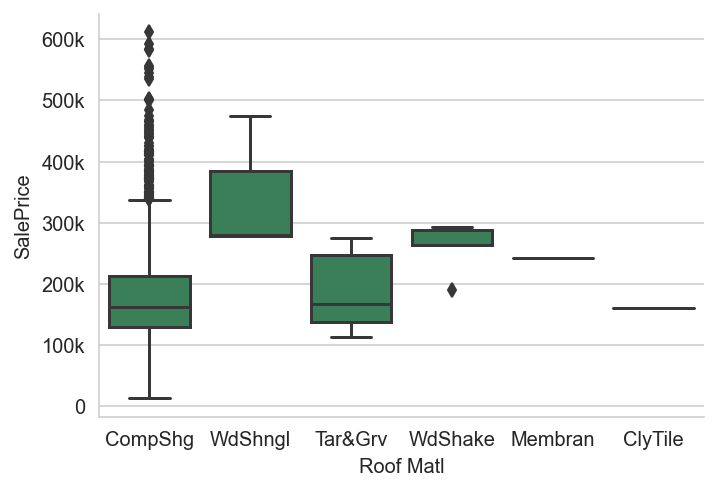

In [48]:
boxplt('Roof Matl',hgt=3.5,asp=1.5) 

Properties with Standard (Composite) Shingle (outliers) or Wood Shingles are associated with higher `SalePrice`. 

_Extreme outlier present:_

In [49]:
train_df.loc[(train_df['Roof Matl']=='WdShake')&(train_df['SalePrice']<200000),
            ['Roof Matl','SalePrice']]

Roof Matl  SalePrice
1780   WdShake     190000

#### `Exterior 1st` distribution:

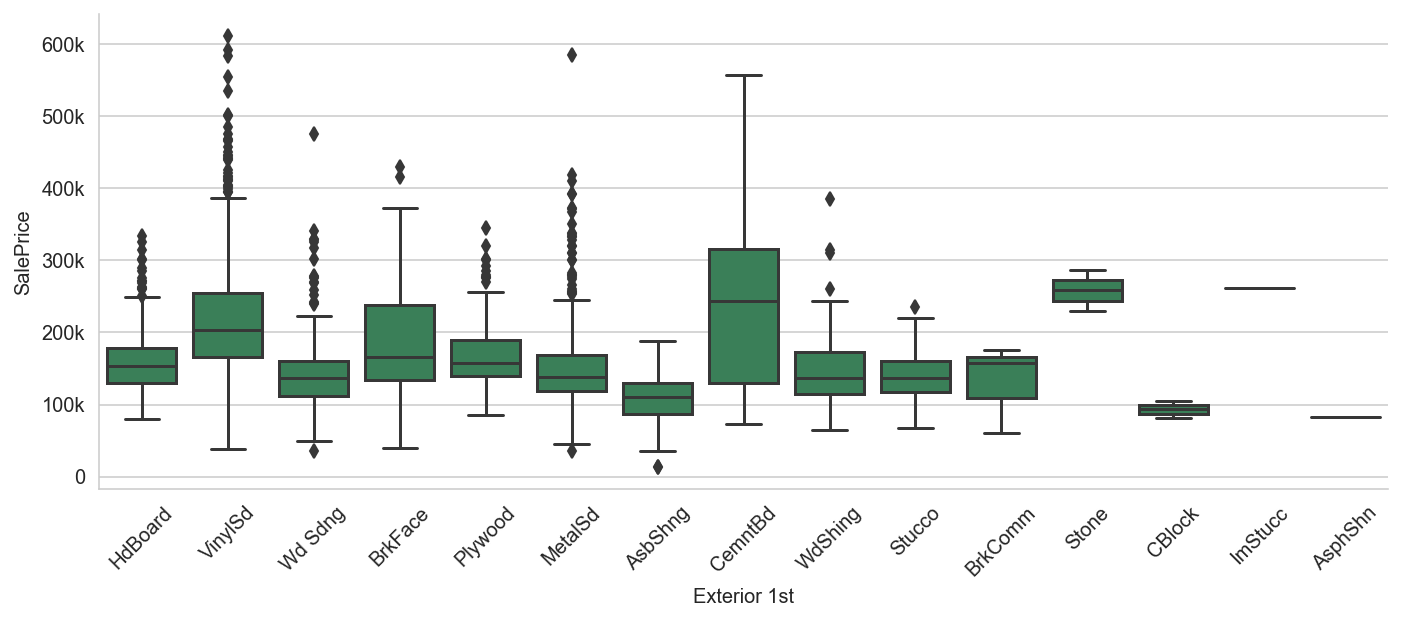

In [50]:
boxplt('Exterior 1st',hgt=4,asp=2.5) 
plt.xticks(rotation=45);

Properties with Cement Board or Vinyl Siding (outliers) exterior are associated with higher `SalePrice`.

_Extreme outliers present:_

In [51]:
train_df.loc[(train_df['Exterior 1st']=='Wd Sdng')&(train_df['SalePrice']>400000)|
            (train_df['Exterior 1st']=='MetalSd')&(train_df['SalePrice']>500000),
            ['Exterior 1st','SalePrice']]

Exterior 1st  SalePrice
1035      Wd Sdng     475000
1692      MetalSd     584500

#### `Exterior 2nd` distribution:

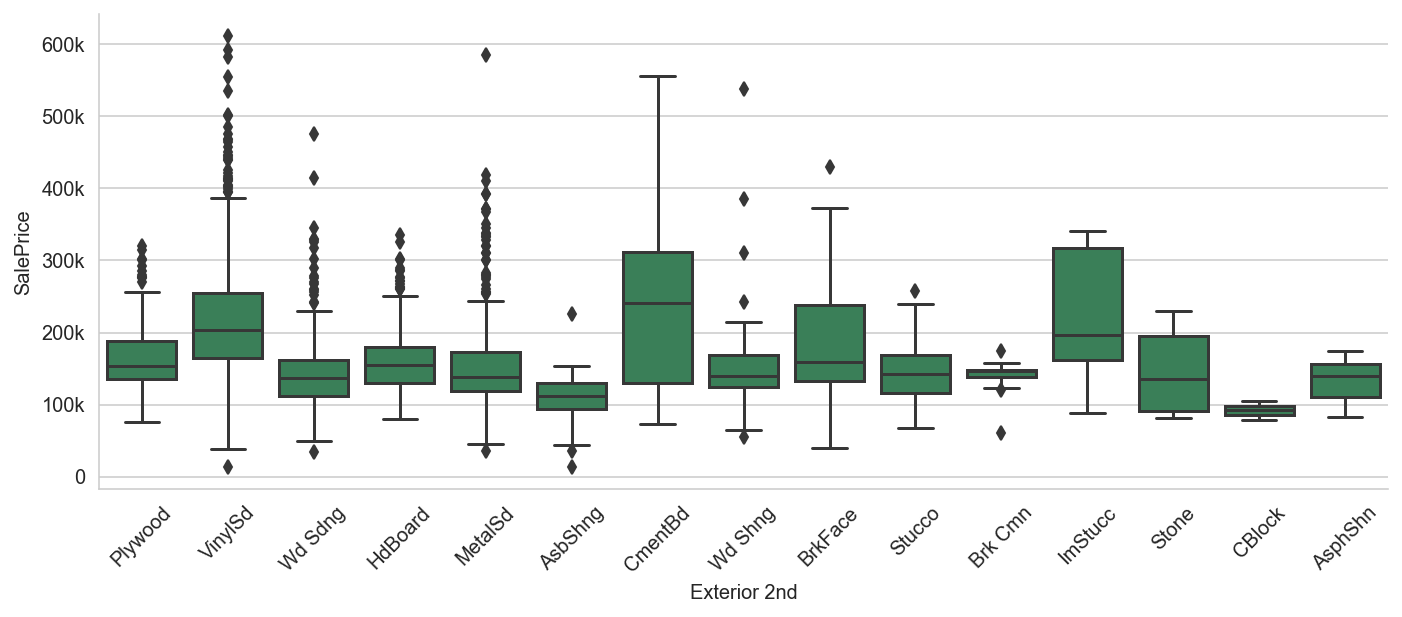

In [52]:
boxplt('Exterior 2nd',hgt=4,asp=2.5) 
plt.xticks(rotation=45);

Properties with Vinyl Siding (outlier), Cement Board, and Imitation Stucco as second exterior are associated with higher `SalePrice`.

_Extreme outliers present:_

In [53]:
train_df.loc[(train_df['Exterior 2nd']=='MetalSd')&(train_df['SalePrice']>500000)|
            (train_df['Exterior 2nd']=='Wd Shng')&(train_df['SalePrice']>500000),
            ['Exterior 2nd','SalePrice']]

Exterior 2nd  SalePrice
823       Wd Shng     538000
1692      MetalSd     584500

#### `Mas Vnr Type` distribution:

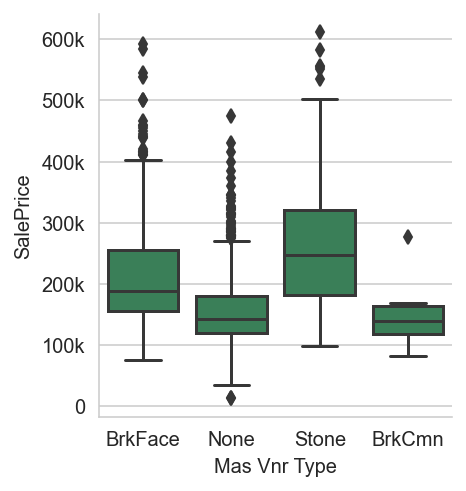

In [54]:
boxplt('Mas Vnr Type',hgt=3.5,asp=1) 

Properties with Stone Masonry veneer type are associated with higher `SalePrice`.

_Extreme outlier present:_

In [55]:
train_df.loc[(train_df['Mas Vnr Type']=='BrkCmn')&(train_df['SalePrice']>200000),
            ['Mas Vnr Type','SalePrice']]

Mas Vnr Type  SalePrice
471       BrkCmn     277000

#### `Mas Vnr Area` distribution:

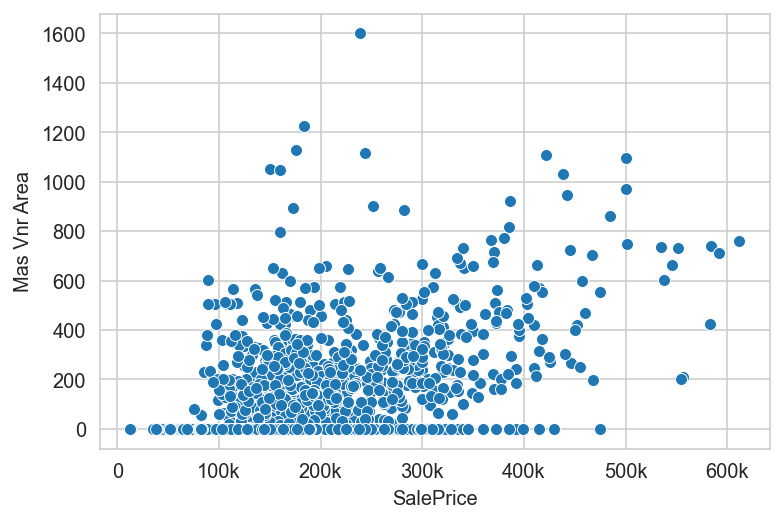

In [56]:
scatterplt(var='Mas Vnr Area')

_Outlier present:_

In [57]:
train_df.loc[(train_df['Mas Vnr Area']>1400), ['Mas Vnr Area']]

Mas Vnr Area
1409        1600.0

#### `Exter Qual` distribution:

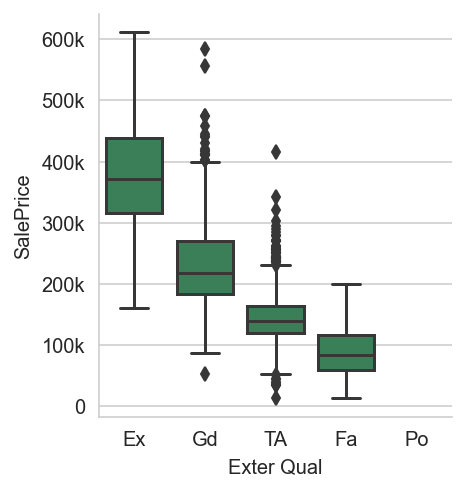

In [58]:
boxplt_order('Exter Qual',hgt=3.5,asp=1,order=['Ex','Gd','TA','Fa','Po']) 

There is a positive association between `Exter Qual` and `SalePrice`. No extreme outliers.

#### `Exter Cond` distribution:

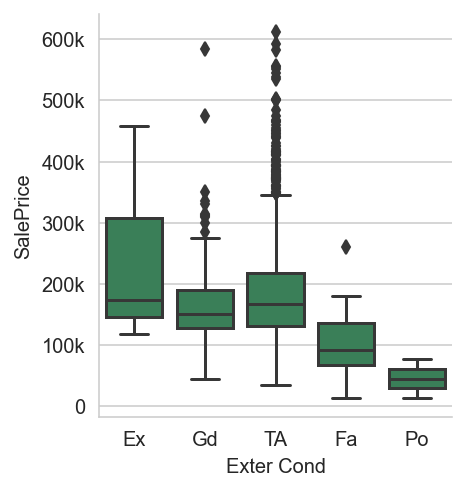

In [59]:
boxplt_order('Exter Cond',hgt=3.5,asp=1,order=['Ex','Gd','TA','Fa','Po']) 

There is weak association between `Exter Cond` and `SalePrice`.

_Extreme outliers present:_

In [60]:
train_df.loc[(train_df['Exter Cond']=='Gd')&(train_df['SalePrice']>400000)|
            (train_df['Exter Cond']=='Fa')&(train_df['SalePrice']>200000),
            ['Exter Cond','SalePrice']]

Exter Cond  SalePrice
761          Fa     260000
1035         Gd     475000
1692         Gd     584500

#### `Foundation` distribution:

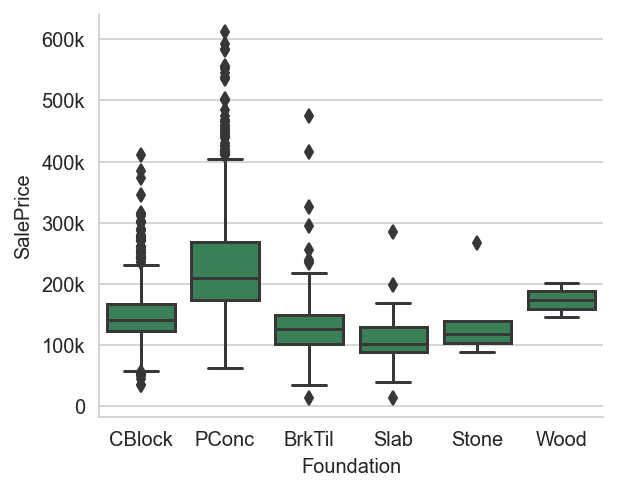

In [61]:
boxplt('Foundation',hgt=3.5,asp=1.3) 

Properties with Poured Contrete	foundation are associated with higher `SalePrice`.

_Extreme outlier present:_

In [62]:
train_df.loc[(train_df['Foundation']=='Stone')&(train_df['SalePrice']>200000),
            ['Foundation','SalePrice']]

Foundation  SalePrice
1759      Stone     266500

#### `Bsmt Qual` distribution:

In [63]:
# rename NA so that it will show on plot
train_df['Bsmt Qual'].replace({np.nan:'No basement'}, inplace=True)

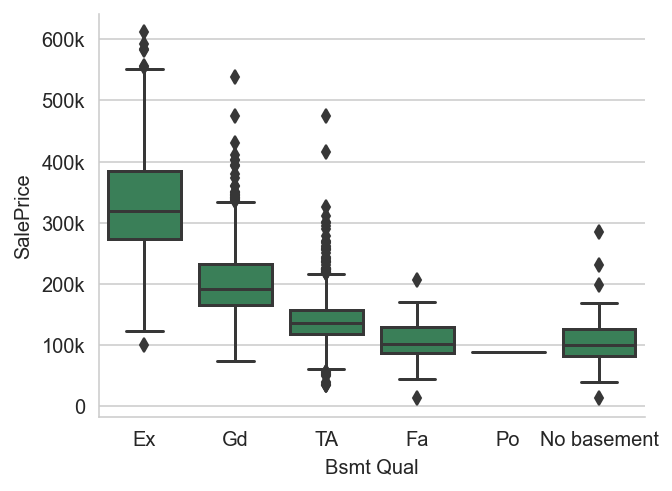

In [64]:
boxplt_order('Bsmt Qual',hgt=3.5,asp=1.4,order=['Ex','Gd','TA','Fa','Po','No basement']) 

There is a positive association between `Bsmt Qual` and `SalePrice`. No extreme outliers.

#### `Bsmt Cond` distribution:

In [65]:
# rename NA so that it will show on plot
train_df['Bsmt Cond'].replace({np.nan:'No basement'}, inplace=True)

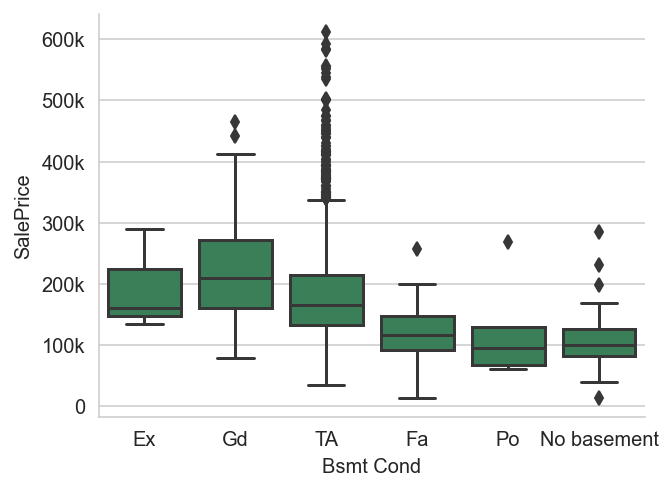

In [66]:
boxplt_order('Bsmt Cond',hgt=3.5,asp=1.4,order=['Ex','Gd','TA','Fa','Po','No basement']) 

Properties with typical basement condition have the widest range of `SalePrice` and also associated with high `SalePrice`s (outliers).

_Extreme outlier present:_

In [67]:
train_df.loc[(train_df['Bsmt Cond']=='Po')&(train_df['SalePrice']>200000),
            ['Bsmt Cond','SalePrice']]

Bsmt Cond  SalePrice
144        Po     267916

#### `Bsmt Exposure` distribution:

In [68]:
# rename NA so that it will show on plot
train_df['Bsmt Exposure'].replace({np.nan:'No basement'}, inplace=True)

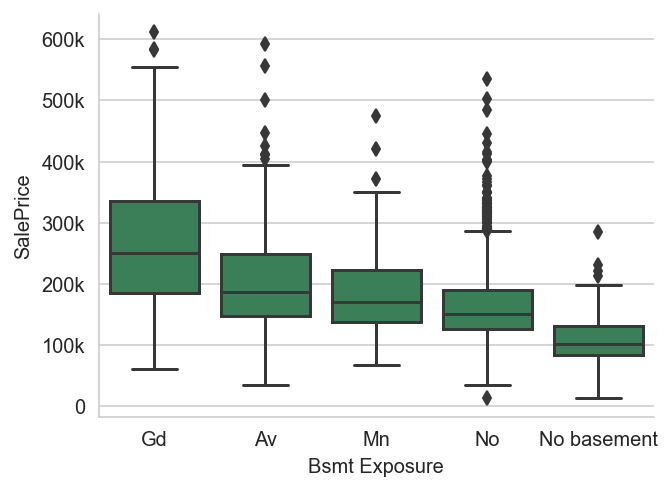

In [69]:
boxplt_order('Bsmt Exposure',hgt=3.5,asp=1.4,order=['Gd','Av','Mn','No','No basement']) 

There is a weak association between `Bsmt Exposure` and `SalePrice`. No extreme outliers.

#### `BsmtFin Type 1` distribution:

In [70]:
# rename NA so that it will show on plot
train_df['BsmtFin Type 1'].replace({np.nan:'No basement'}, inplace=True)

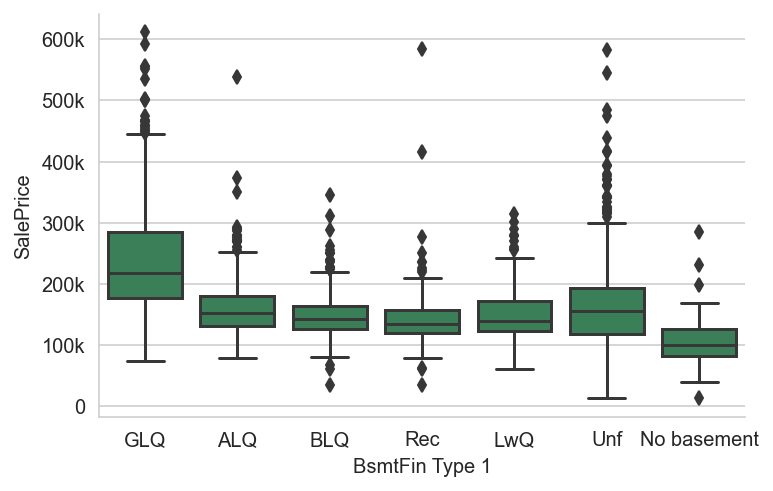

In [71]:
boxplt_order('BsmtFin Type 1',hgt=3.5,asp=1.6,order=['GLQ','ALQ','BLQ','Rec','LwQ','Unf','No basement']) 

Properties with Good living quarters and unfinished basement (outliers) were associated with higher `SalePrice`.

_Extreme outliers present:_

In [72]:
train_df.loc[(train_df['BsmtFin Type 1']=='ALQ')&(train_df['SalePrice']>500000)|
            (train_df['BsmtFin Type 1']=='Rec')&(train_df['SalePrice']>400000),
            ['BsmtFin Type 1','SalePrice']]

BsmtFin Type 1  SalePrice
823             ALQ     538000
1692            Rec     584500
1897            Rec     415000

#### `BsmtFin SF 1` distribution:

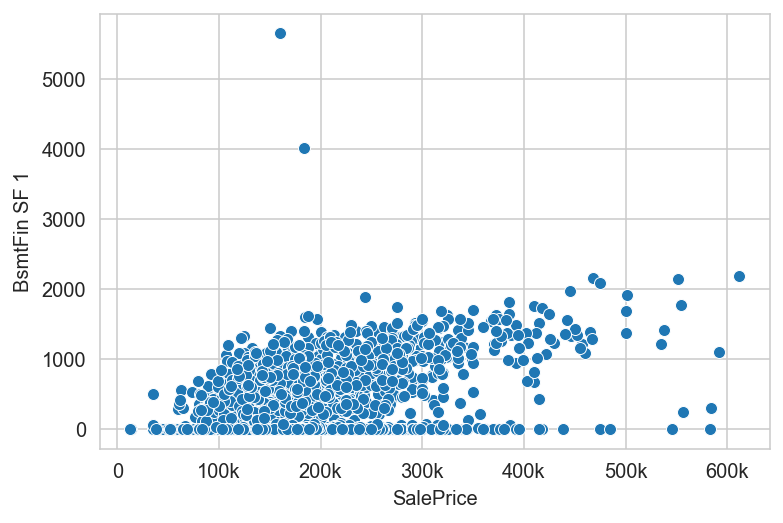

In [73]:
scatterplt(var='BsmtFin SF 1')

_Outliers present:_

In [74]:
train_df.loc[(train_df['BsmtFin SF 1']>3500), ['BsmtFin SF 1']]

BsmtFin SF 1
960         5644.0
1885        4010.0

#### `BsmtFin Type 2` distribution:

In [75]:
# rename NA so that it will show on plot
train_df['BsmtFin Type 2'].replace({np.nan:'No basement'}, inplace=True)

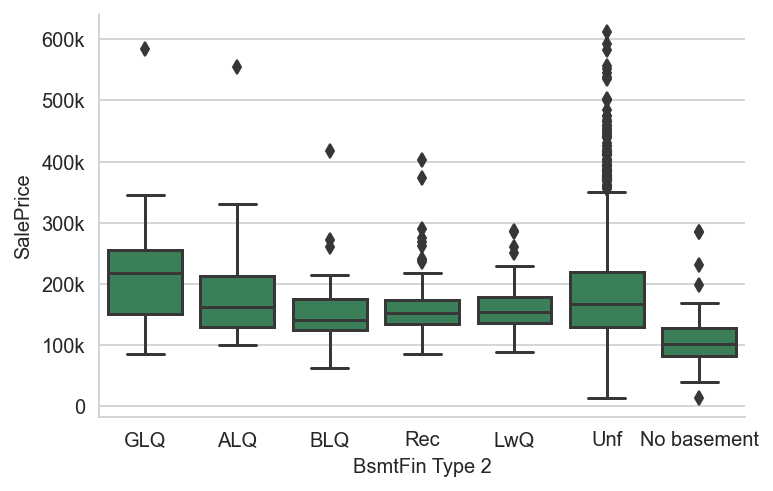

In [76]:
boxplt_order('BsmtFin Type 2',hgt=3.5,asp=1.6,order=['GLQ','ALQ','BLQ','Rec','LwQ','Unf','No basement']) 

Properties with good living quarters or unfinished basements are associated with higher `SalePrice`.

_Extreme outliers present:_

In [77]:
train_df.loc[(train_df['BsmtFin Type 2']=='GLQ')&(train_df['SalePrice']>500000)|
            (train_df['BsmtFin Type 2']=='ALQ')&(train_df['SalePrice']>500000)|
            (train_df['BsmtFin Type 2']=='BLQ')&(train_df['SalePrice']>400000),
            ['BsmtFin Type 2','SalePrice']]

BsmtFin Type 2  SalePrice
1058            BLQ     417500
1164            ALQ     555000
1692            GLQ     584500

#### `BsmtFin SF 2` distribution:

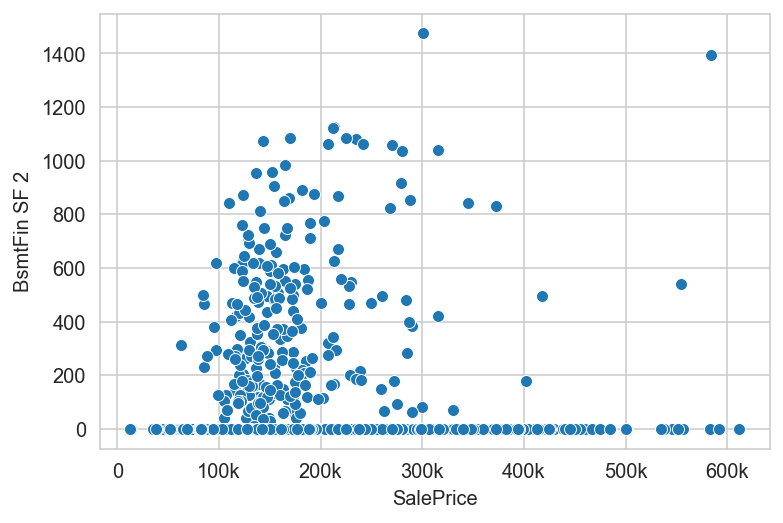

In [78]:
scatterplt(var='BsmtFin SF 2')

_Outliers present:_

In [79]:
train_df.loc[(train_df['BsmtFin SF 2']>1200), ['BsmtFin SF 2']]

BsmtFin SF 2
770         1474.0
1692        1393.0

Based on the 2 scatterplots above, the distributions of `BsmtFin SF 1` and `BsmtFin SF 2` have poor value in determining `SalePrice`. I will consider these 2 features to have low predictive value for `SalePrice`.

#### `Bsmt Unf SF` distribution:

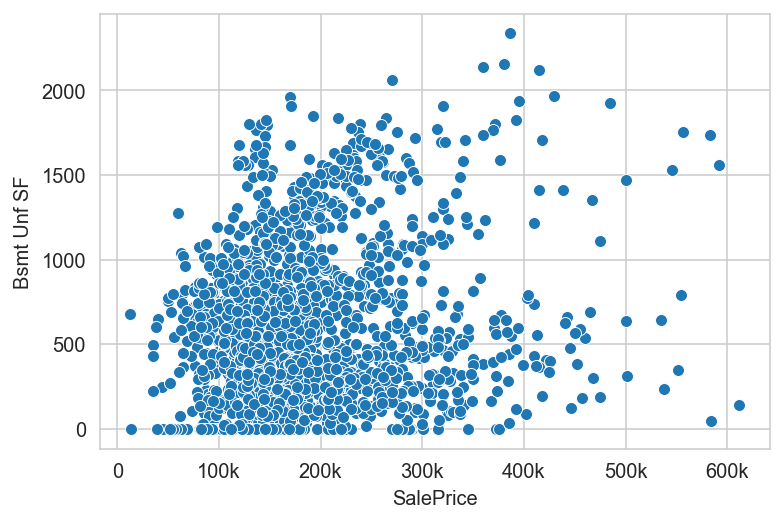

In [80]:
scatterplt(var='Bsmt Unf SF')

_No gross outliers._

#### `Total Bsmt SF` distribution:

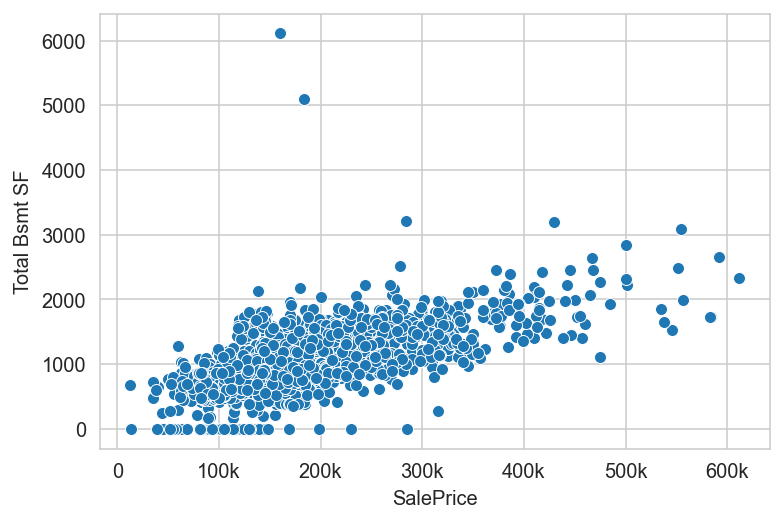

In [81]:
scatterplt(var='Total Bsmt SF')

_Outliers present:_

In [82]:
train_df.loc[(train_df['Total Bsmt SF']>5000), ['Total Bsmt SF']]

Total Bsmt SF
960          6110.0
1885         5095.0

#### `Heating` distribution:

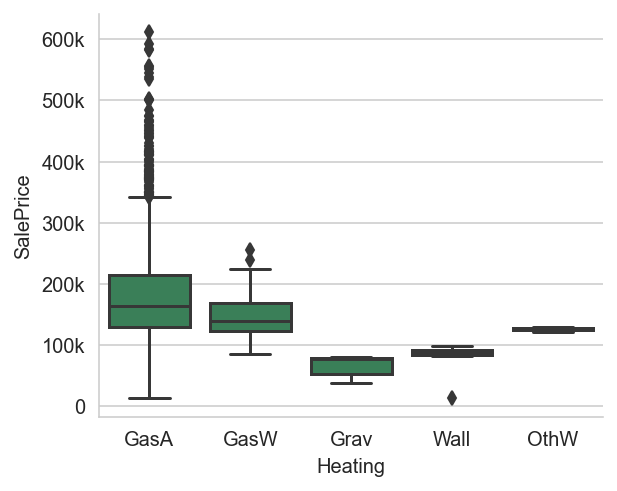

In [83]:
boxplt('Heating',hgt=3.5,asp=1.3) 

Properties with Gas forced warm air furnace(GasA) were associated with high `SalePrice`.

_Extreme outlier present:_

In [84]:
train_df.loc[(train_df['Heating']=='Wall')&(train_df['SalePrice']<50000),
            ['Heating','SalePrice']]

Heating  SalePrice
183    Wall      13100

#### `Heating QC` distribution:

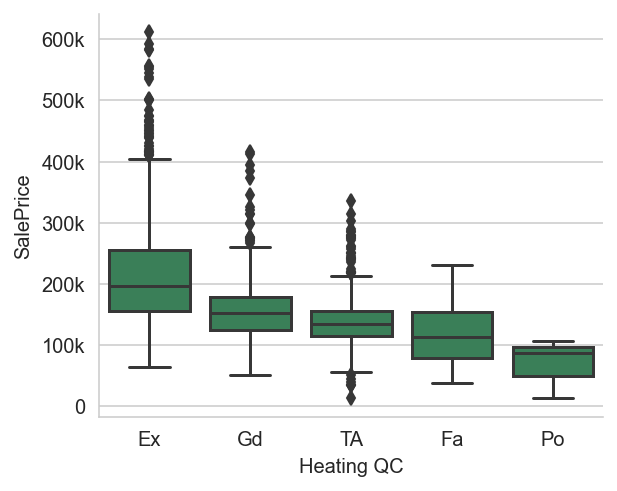

In [85]:
boxplt_order('Heating QC',hgt=3.5,asp=1.3,order=['Ex','Gd','TA','Fa','Po']) 

There is a weak positive association between `Heating QC` and `SalePrice`. No extreme outliers.

#### `Central Air` distribution:

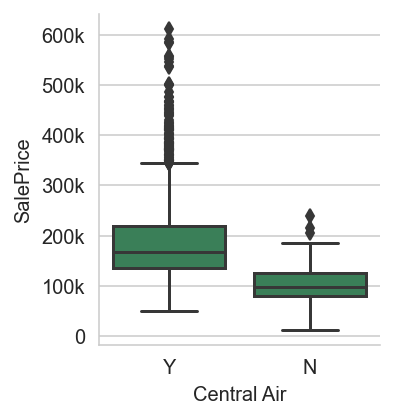

In [86]:
boxplt('Central Air',hgt=3,asp=1)

Properties with Central air conditioning were associated with a higher `SalePrice`. No extreme outliers.

#### `Electrical` distribution:

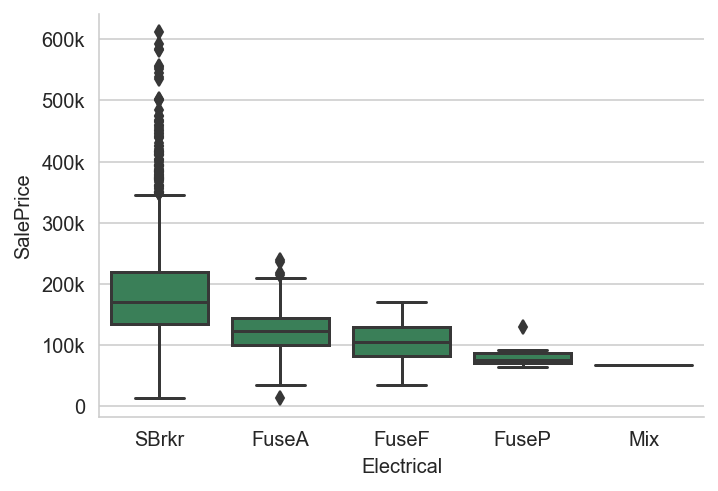

In [87]:
boxplt_order('Electrical',hgt=3.5,asp=1.5,order=['SBrkr','FuseA','FuseF','FuseP','Mix'])

Properties with Standard Circuit Breakers & Romex(SBrkr) are associated with higher `SalePrice`. No extreme outliers.

#### `1st Flr SF` distribution:

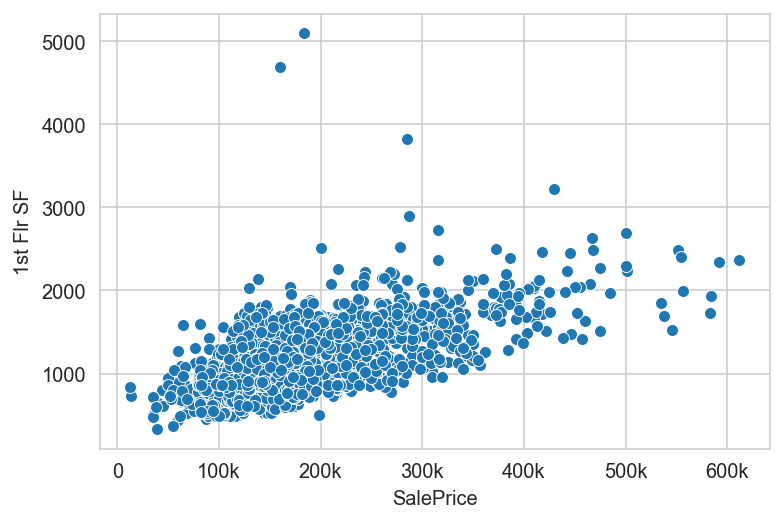

In [88]:
scatterplt(var='1st Flr SF')

_Outliers present:_

In [89]:
train_df.loc[(train_df['1st Flr SF']>4000), ['1st Flr SF']]

1st Flr SF
960         4692
1885        5095

#### `2nd Flr SF` distribution:

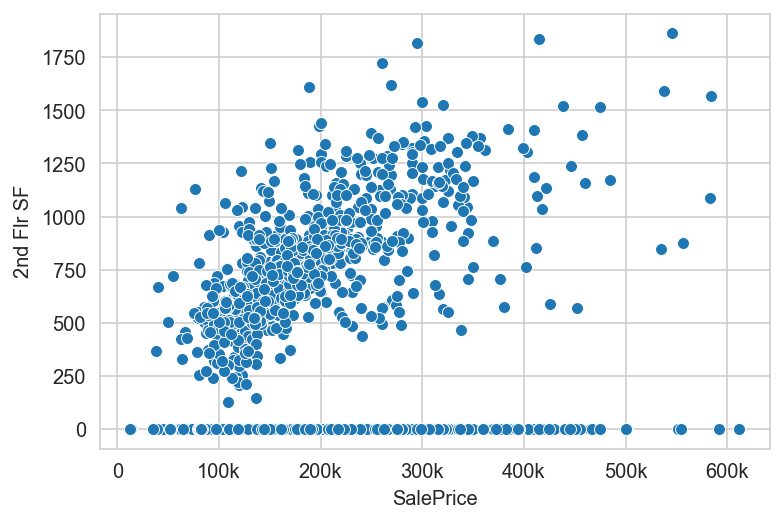

In [90]:
scatterplt(var='2nd Flr SF')

_No gross outliers._

Based on the spread of data points for `2nd Flr SF` feature, with lots of '0's spread across the entire range of `SalePrice`, I will consider this feature having low predictive value for `SalePrice`.

#### `Low Qual Fin SF` distribution:

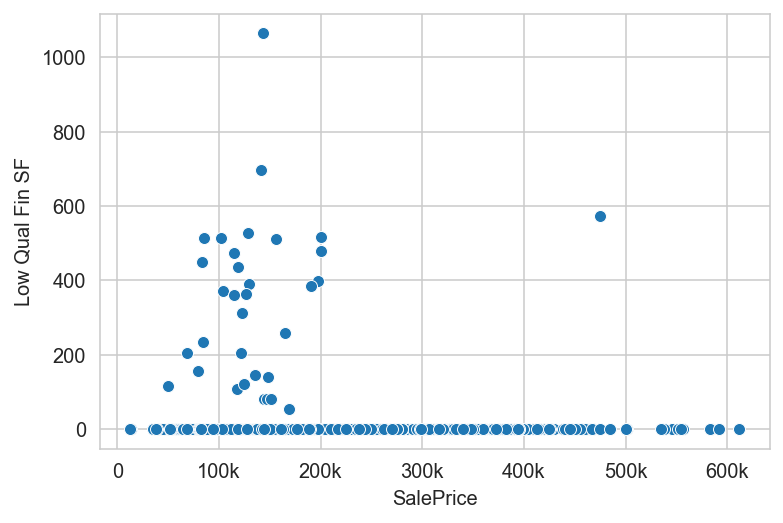

In [91]:
scatterplt(var='Low Qual Fin SF')

_Outliers present:_

In [92]:
train_df.loc[(train_df['Low Qual Fin SF']>1000) | 
             ((train_df['Low Qual Fin SF']>500)&(train_df['SalePrice']>400000)), 
             ['Low Qual Fin SF','SalePrice']]

Low Qual Fin SF  SalePrice
828              1064     142900
1035              572     475000

Based on the spread of data points for `Low Qual Fin SF` feature, with lots of '0's spread across the entire range of `SalePrice`, I will consider this feature to have low predictive value for `SalePrice`.

#### `Gr Liv Area` distribution:

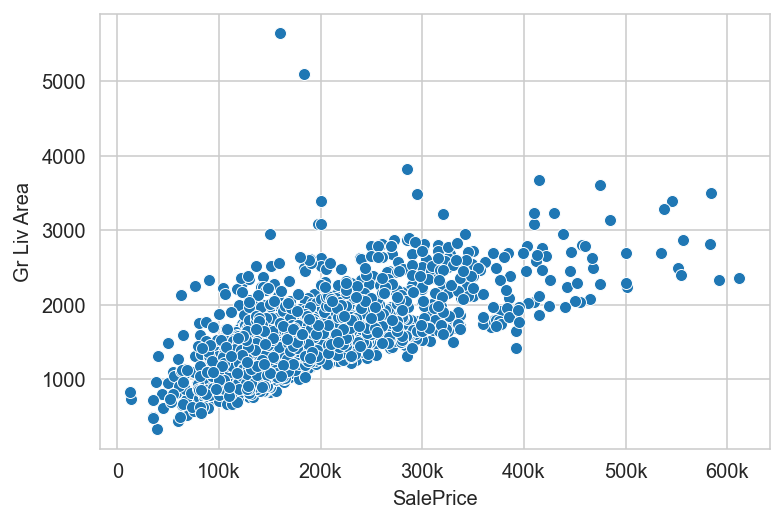

In [93]:
scatterplt(var='Gr Liv Area')

_Outliers present:_

In [94]:
train_df.loc[(train_df['Gr Liv Area']>4000), ['Gr Liv Area']]

Gr Liv Area
960          5642
1885         5095

#### `Bsmt Full Bath` distribution:

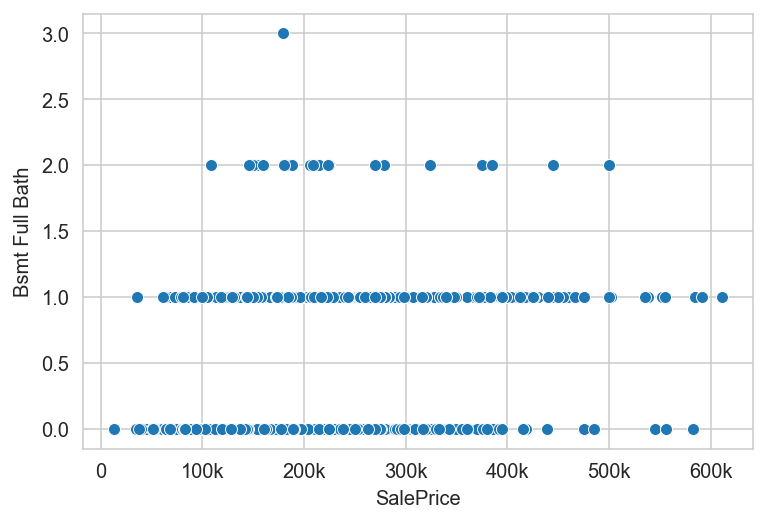

In [95]:
scatterplt(var='Bsmt Full Bath')

Based on the spread of data points for `Bsmt Full Bath` feature, with lots of '0's spread across the entire range of `SalePrice`, and no discernible pattern to `SalePrice`, I will consider this feature to have low predictive value for `SalePrice`.

#### `Bsmt Half Bath` distribution:

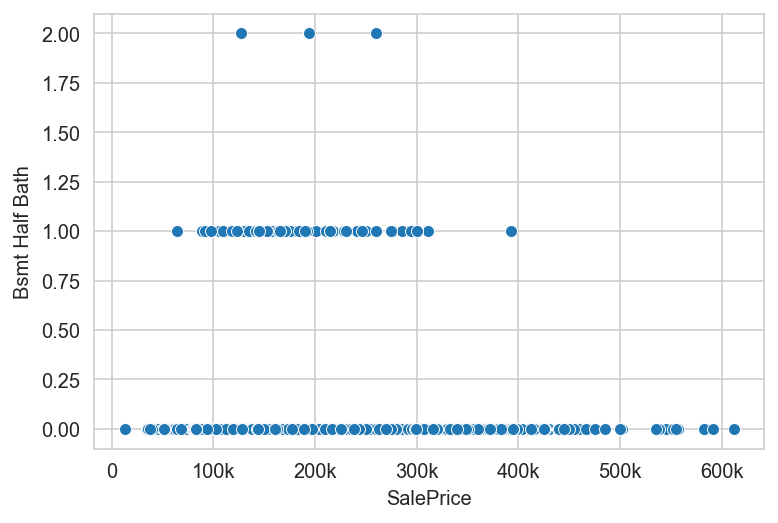

In [96]:
scatterplt(var='Bsmt Half Bath')

Based on the spread of data points for `Bsmt Half Bath` feature, with lots of '0's spread across the entire range of `SalePrice`, I will consider this feature to have low predictive value for `SalePrice`.

#### `Full Bath` distribution:

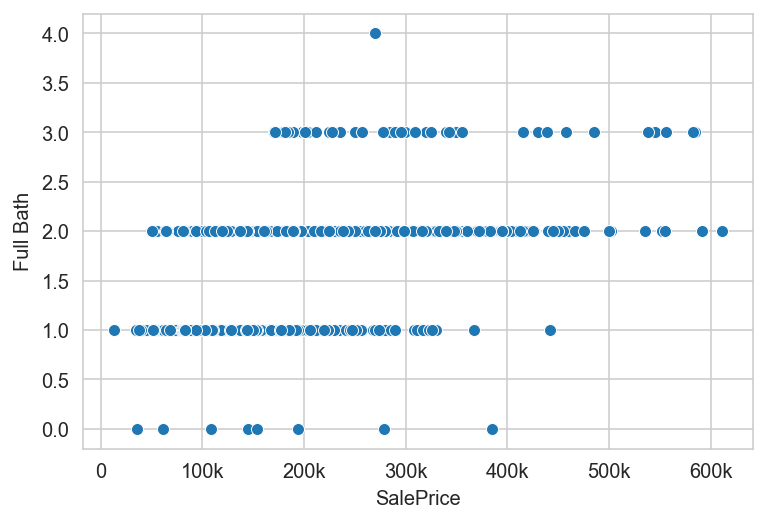

In [97]:
scatterplt(var='Full Bath')

There is a weak positive relationship between `Full Bath`(0-3) and `SalePrice`. 

_Outliers present:_

In [98]:
train_df.loc[(train_df['Full Bath']==4), ['Full Bath','SalePrice']]

Full Bath  SalePrice
1566          4     269500
1605          4     269500

#### `Half Bath` distribution:

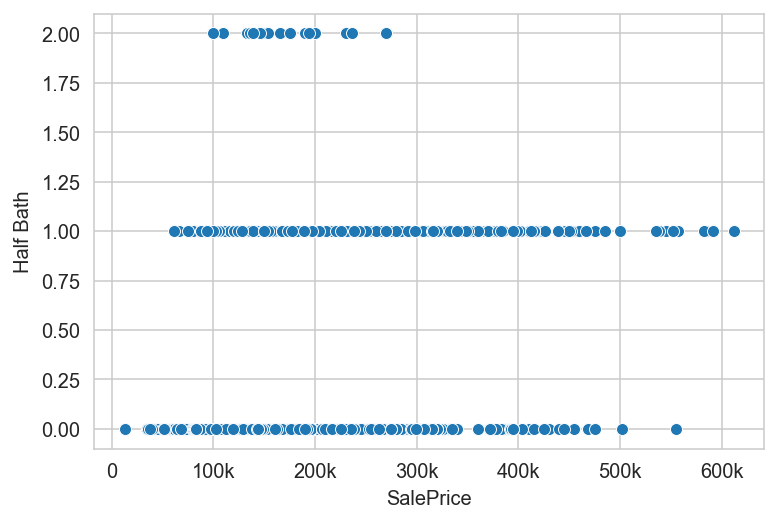

In [99]:
scatterplt(var='Half Bath')

Based on the spread of data points for `Half Bath` feature, with lots of '0's spread across the entire range of `SalePrice` and no discernible pattern with `SalePrice`, I will consider this feature of low predictive value for `SalePrice`.

#### `Bedroom AbvGr` distribution:

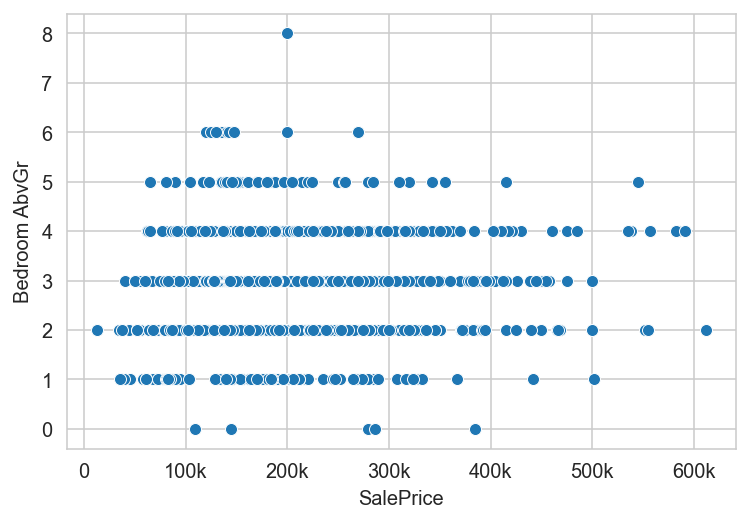

In [100]:
scatterplt(var='Bedroom AbvGr')

Based on the spread of data points for `Bedroom AbvGr` feature, with no discernable relationship with `SalePrice`, I will consider this feature of low predictive value for `SalePrice`.

#### `Kitchen AbvGr` distribution:

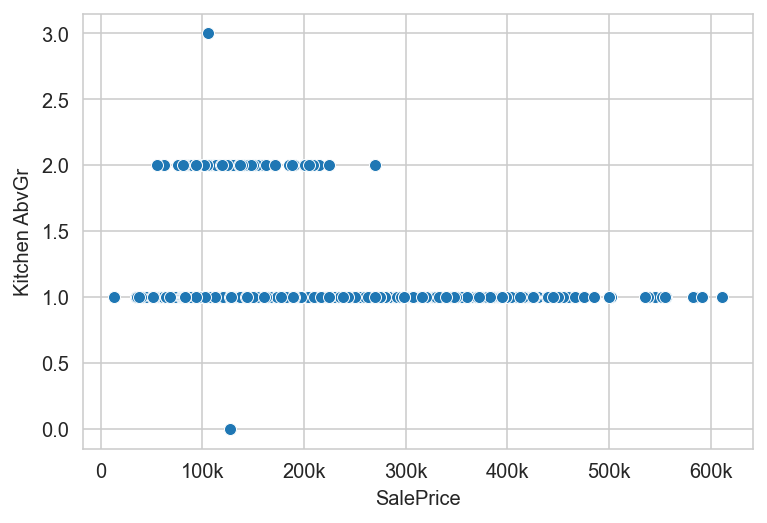

In [101]:
scatterplt(var='Kitchen AbvGr')

Based on the spread of data points for `Kitchen AbvGr` feature, with no discernable relationship with `SalePrice`, I will consider this feature of low predictive value for `SalePrice`.

#### `Kitchen Qual` distribution:

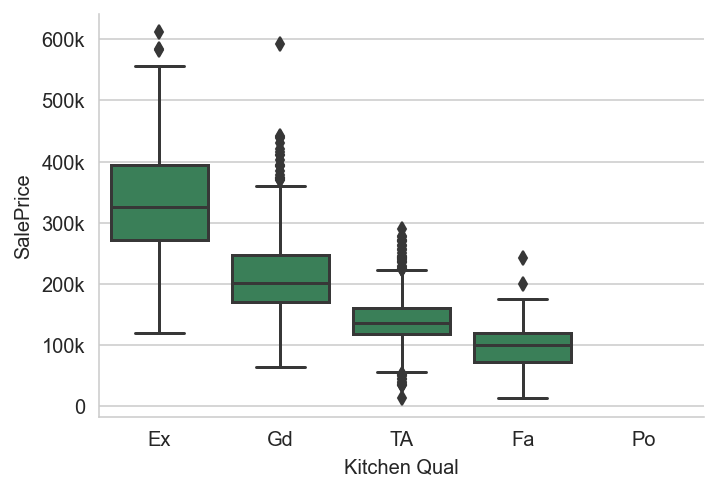

In [102]:
boxplt_order('Kitchen Qual',hgt=3.5,asp=1.5,order=['Ex','Gd','TA','Fa','Po'])

There is a positive association between `Kitchen Qual` and `SalePrice`.

_Extreme outlier present:_

In [103]:
train_df.loc[(train_df['Kitchen Qual']=='Gd')&(train_df['SalePrice']>500000),
            ['Kitchen Qual','SalePrice']]

Kitchen Qual  SalePrice
1964           Gd     591587

#### `TotRms AbvGrd` distribution: 

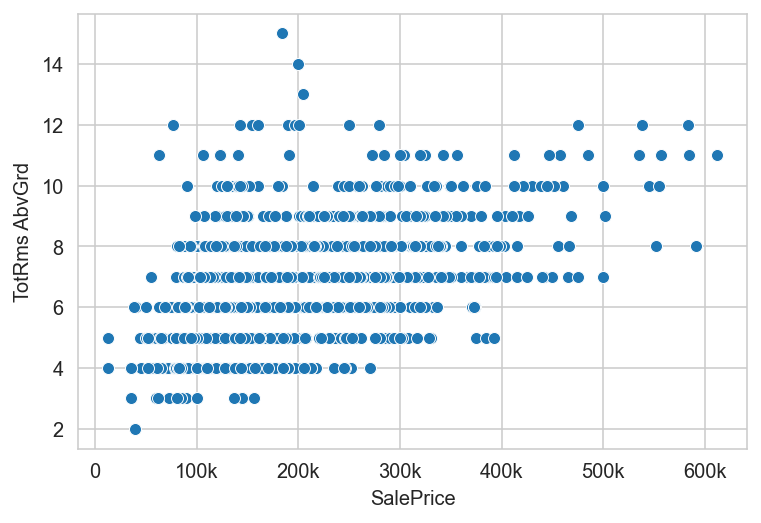

In [104]:
scatterplt(var='TotRms AbvGrd')

There is a weak positive association between `TotRms AbvGrd` (0-12) and `SalePrice`.

_Outliers present:_

In [105]:
train_df.loc[(train_df['TotRms AbvGrd']>12), ['TotRms AbvGrd']]

TotRms AbvGrd
858              14
1791             13
1885             15

#### `Functional` distribution:

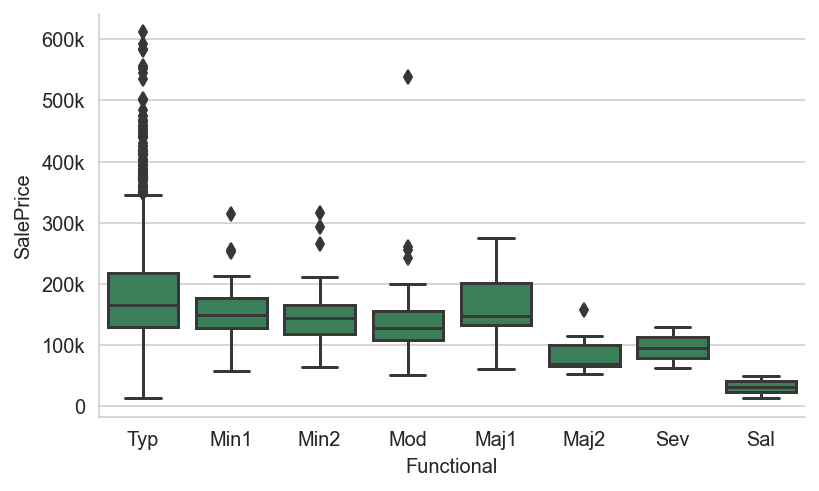

In [106]:
boxplt_order('Functional',hgt=3.5,asp=1.7,order=['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'])

Properties with Typical Functionality are associated with high `SalePrice`(outliers).

_Extreme outlier present:_

In [107]:
train_df.loc[(train_df['Functional']=='Mod')&(train_df['SalePrice']>500000),
            ['Functional','SalePrice']]

Functional  SalePrice
823        Mod     538000

#### `Fireplaces` distribution:

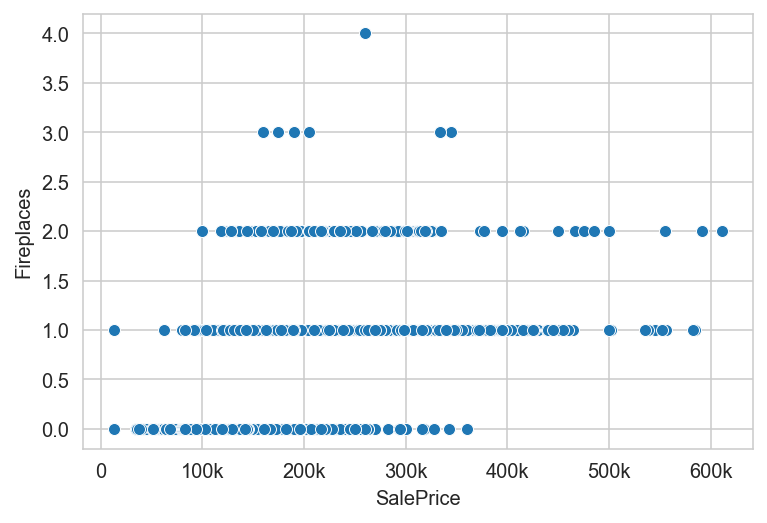

In [108]:
scatterplt(var='Fireplaces')

No gross outliers. There is weak positive correlation between 0 and 2 `Fireplaces` and `SalePrice`.

#### `Fireplace Qu` distribution:

In [109]:
# rename NA so that it will show on plot
train_df['Fireplace Qu'].replace({np.nan:'No fireplace'}, inplace=True)

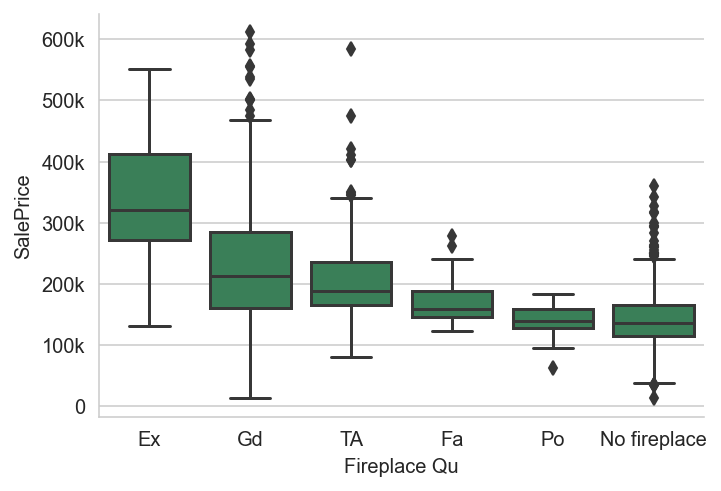

In [110]:
boxplt_order('Fireplace Qu',hgt=3.5,asp=1.5,order=['Ex','Gd','TA','Fa','Po','No fireplace'])

There is a weak association between `Fireplace Qu` and `SalePrice`. 

_Extreme outlier present:_

In [111]:
train_df.loc[(train_df['Fireplace Qu']=='TA')&(train_df['SalePrice']>500000),
            ['Fireplace Qu','SalePrice']]

Fireplace Qu  SalePrice
1692           TA     584500

#### `Garage Type` distribution:

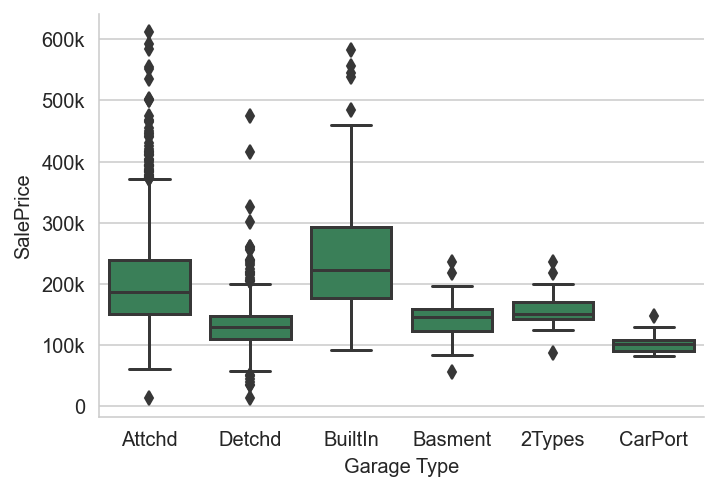

In [112]:
boxplt('Garage Type',hgt=3.5,asp=1.5)

Properties with garages types Attached to home or Built-In were associated with high `SalePrice`.

_Extreme outliers present:_

In [113]:
train_df.loc[(train_df['Garage Type']=='Detchd')&(train_df['SalePrice']>400000),
            ['Garage Type','SalePrice']]

Garage Type  SalePrice
1035      Detchd     475000
1897      Detchd     415000

#### `Garage Finish` distribution:

In [114]:
# rename NA so that it will show on plot
train_df['Garage Finish'].replace({np.nan:'No garage'}, inplace=True)

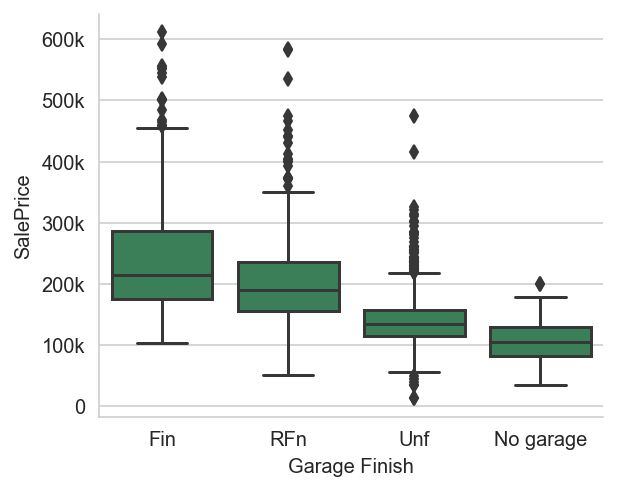

In [115]:
boxplt_order('Garage Finish',hgt=3.5,asp=1.3,order=['Fin','RFn','Unf','No garage'])

There is a weak positive association between `Garage Finish` and `SalePrice`.

_Extreme outliers present:_

In [116]:
train_df.loc[(train_df['Garage Finish']=='Unf')&(train_df['SalePrice']>400000),
            ['Garage Finish','SalePrice']]

Garage Finish  SalePrice
1035           Unf     475000
1897           Unf     415000

#### `Garage Cars` distribution:

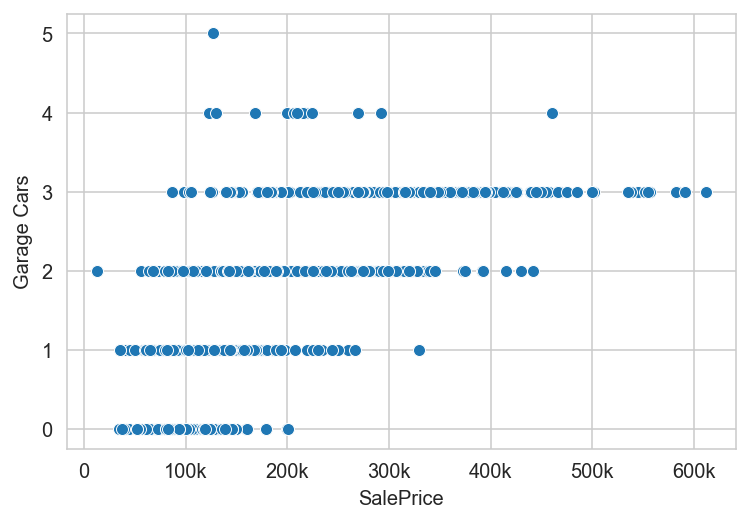

In [117]:
scatterplt(var='Garage Cars')

No gross outliers. There is weak positive correlation between 0 and 3 `Garage Cars` and `SalePrice`.

#### `Garage Area` distribution:

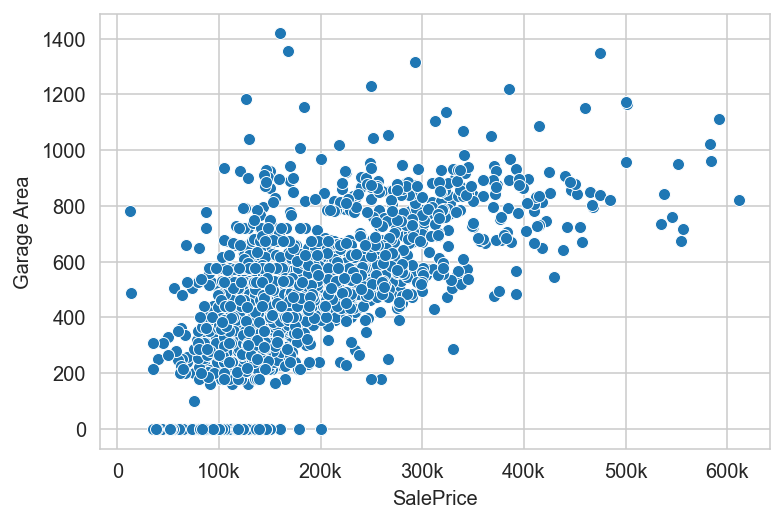

In [118]:
scatterplt(var='Garage Area')

_No gross outliers._

#### `Garage Qual` distribution:

In [119]:
# rename NA so that it will show on plot
train_df['Garage Qual'].replace({np.nan:'No garage'}, inplace=True)

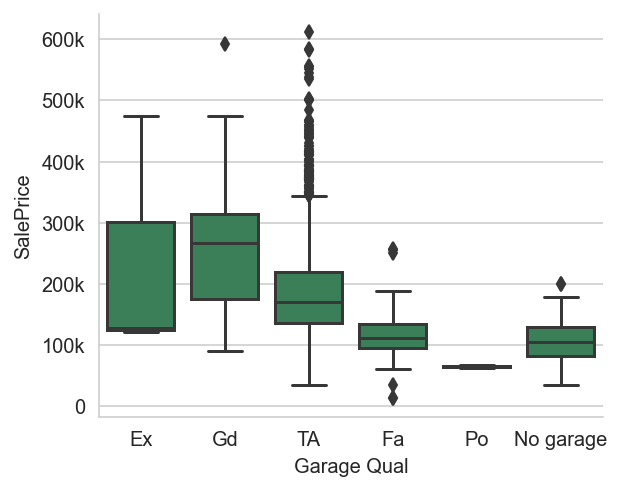

In [120]:
boxplt_order('Garage Qual',hgt=3.5,asp=1.3,order=['Ex','Gd','TA','Fa','Po','No garage'])

Properties with typical `Garage Qual` are associated with high `SalePrice`(outliers).

_Extreme outlier present:_

In [121]:
train_df.loc[(train_df['Garage Qual']=='Gd')&(train_df['SalePrice']>500000),
            ['Garage Qual','SalePrice']]

Garage Qual  SalePrice
1964          Gd     591587

#### `Garage Cond` distribution:

In [122]:
# rename NA so that it will show on plot
train_df['Garage Cond'].replace({np.nan:'No garage'}, inplace=True)

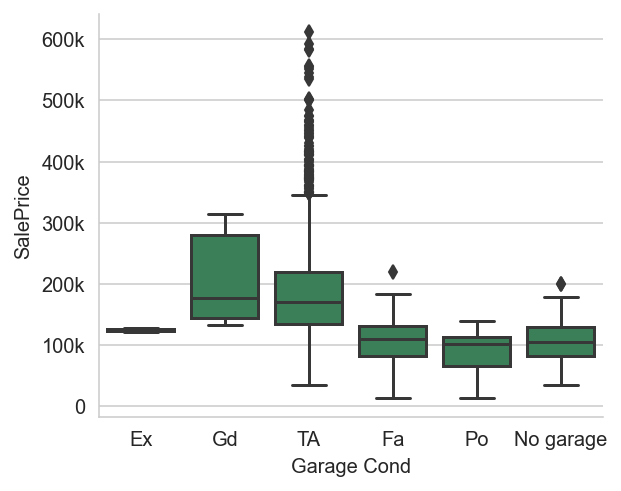

In [123]:
boxplt_order('Garage Cond',hgt=3.5,asp=1.3,order=['Ex','Gd','TA','Fa','Po','No garage'])

Properties with typical `Garage Cond` are associated with high `SalePrice`. No extreme outliers.

#### `Paved Drive` distribution:

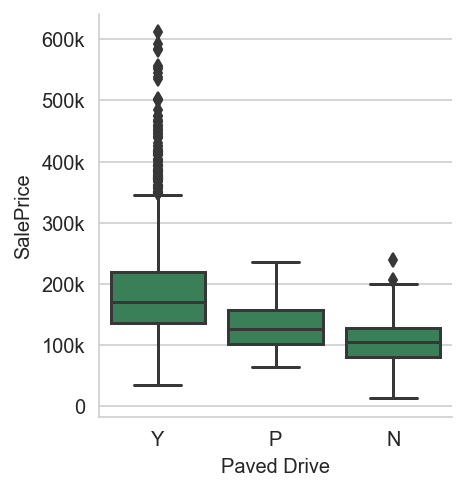

In [124]:
boxplt_order('Paved Drive',hgt=3.5,asp=1,order=['Y','P','N'])

Properties with paved drive were associated with higher `SalePrice`. No extreme outliers

#### `Wood Deck SF` distribution:

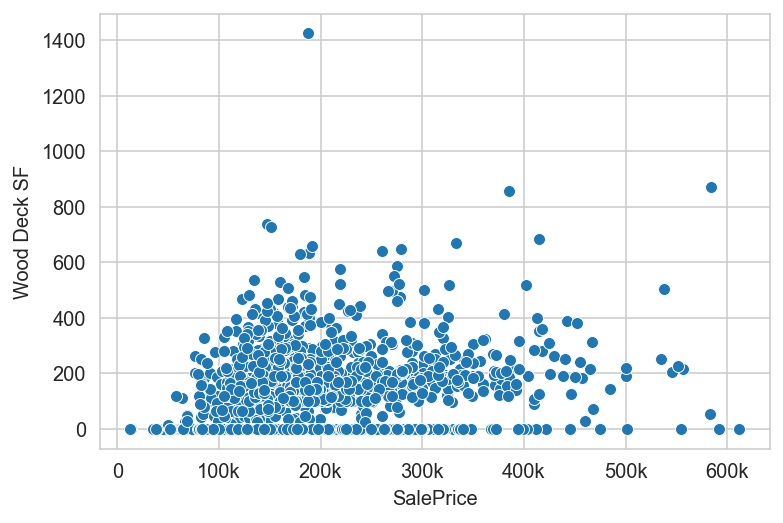

In [125]:
scatterplt(var='Wood Deck SF')

_Outlier present:_

In [126]:
train_df.loc[(train_df['Wood Deck SF']>1400), ['Wood Deck SF']]

Wood Deck SF
966          1424

#### `Open Porch SF` distribution:

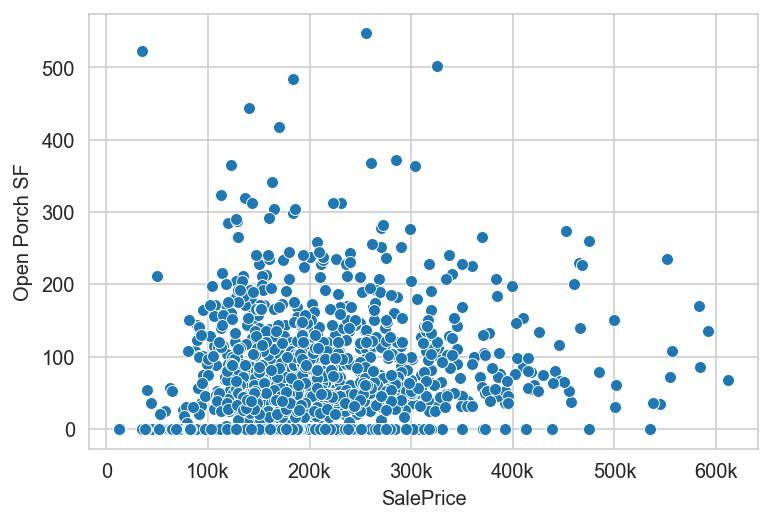

In [127]:
scatterplt(var='Open Porch SF')

_No gross outliers._

#### `Enclosed Porch` distribution:

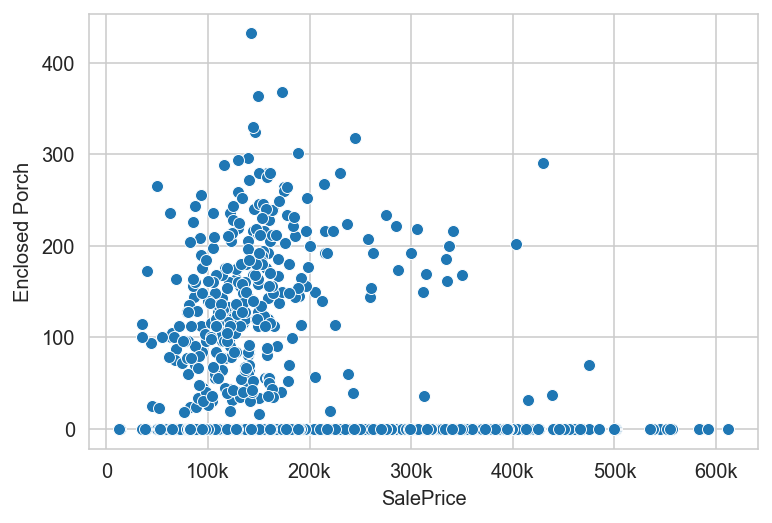

In [128]:
scatterplt(var='Enclosed Porch')

_No gross outliers._

#### `3Ssn Porch` distribution:

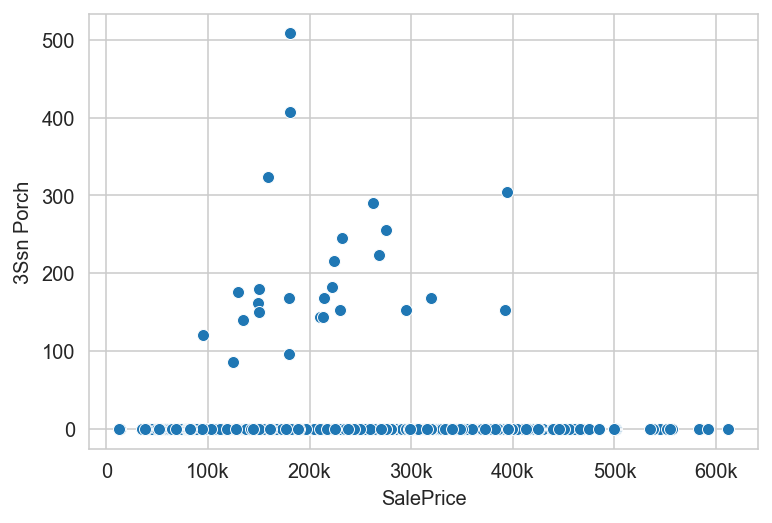

In [129]:
scatterplt(var='3Ssn Porch')

Based on the spread of data points for `3Ssn Porch` feature, with a lot of '0's, I will consider this feature to have low predictive value for `SalePrice`.

#### `Screen Porch` distribution:

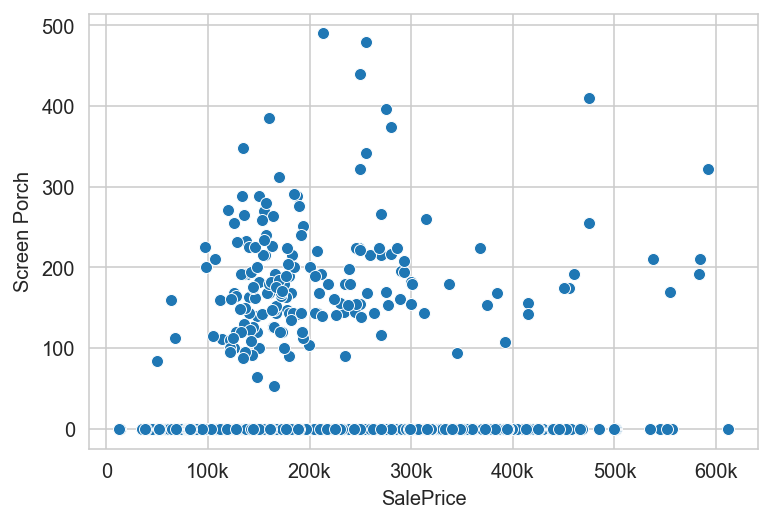

In [130]:
scatterplt(var='Screen Porch')

_No gross outliers._

#### `Pool Area` distribution:

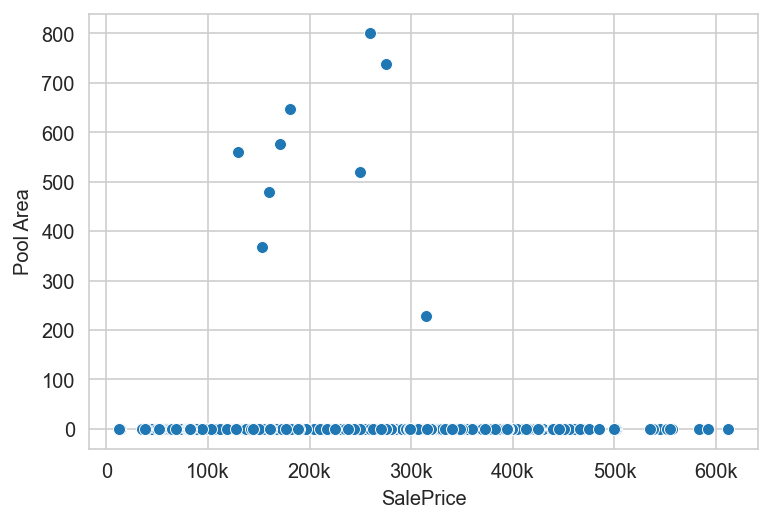

In [131]:
scatterplt(var='Pool Area')

Based on the spread of data points for `Pool Area` feature, with a lot of '0's, I will consider this feature to have low predictive value for `SalePrice`.

#### `Pool QC` distribution:

In [132]:
# rename NA so that it will show on plot
train_df['Pool QC'].replace({np.nan:'No pool'}, inplace=True)

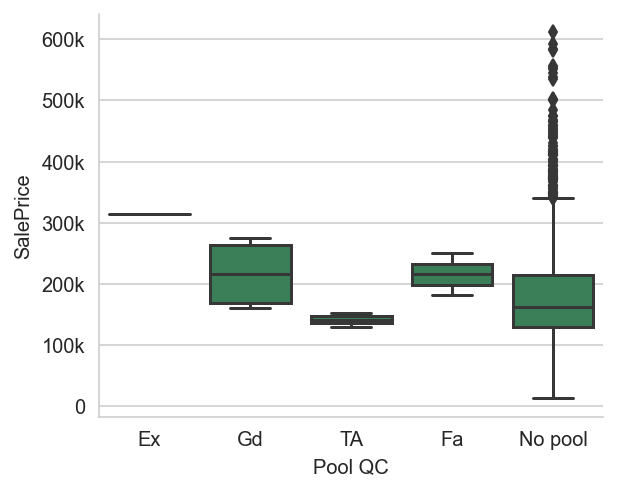

In [133]:
boxplt_order('Pool QC',hgt=3.5,asp=1.3,order=['Ex','Gd','TA','Fa','No pool'])

All properties with high `SalePrice` did not have a pool. No extreme outliers.

#### `Fence` distribution:

In [134]:
# rename NA so that it will show on plot
train_df['Fence'].replace({np.nan:'No fence'}, inplace=True)

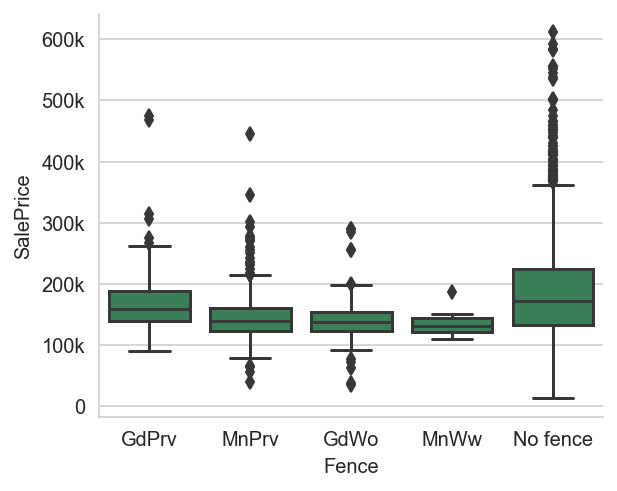

In [135]:
boxplt_order('Fence',hgt=3.5,asp=1.3,order=['GdPrv','MnPrv','GdWo','MnWw','No fence'])

Most properties with high `SalePrice` had no fence.

_Extreme outliers present:_

In [136]:
train_df.loc[(train_df['Fence']=='GdPrv')&(train_df['SalePrice']>400000)|
            (train_df['Fence']=='MnPrv')&(train_df['SalePrice']>400000),
            ['Fence','SalePrice']]

Fence  SalePrice
685   GdPrv     468000
1035  GdPrv     475000
1647  MnPrv     445000

#### `Misc Feature` distribution:

In [137]:
# rename NA so that it will show on plot
train_df['Misc Feature'].replace({np.nan:'None'}, inplace=True)

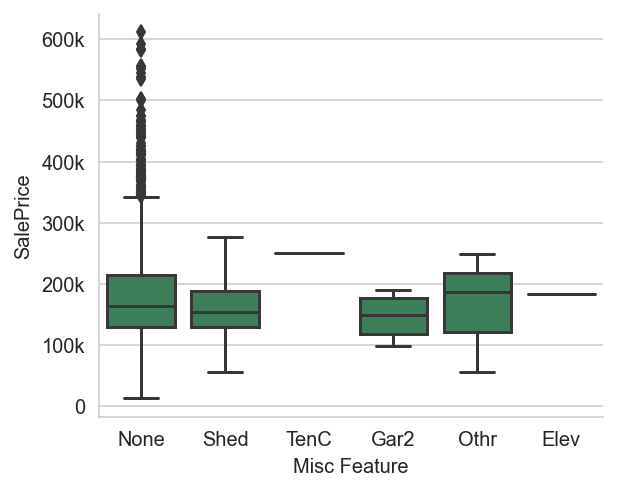

In [138]:
boxplt('Misc Feature',hgt=3.5,asp=1.3)

Properties with high `SalePrice` had no `Misc Feature`. No extreme outliers.

#### `Misc Val` distribution:

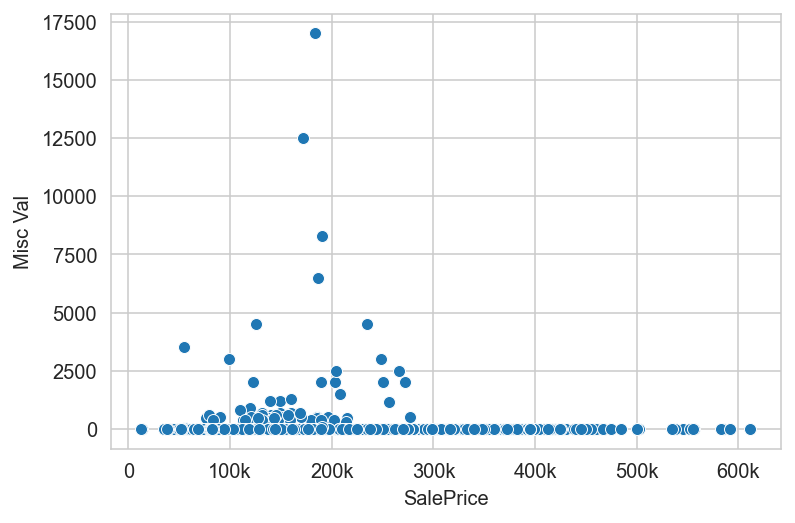

In [139]:
scatterplt(var='Misc Val')

Based on the spread of data points for `Misc Val` feature, with a lot of '0's, I will consider this feature to have low predictive value for `SalePrice`.

#### `Mo Sold` distribution:

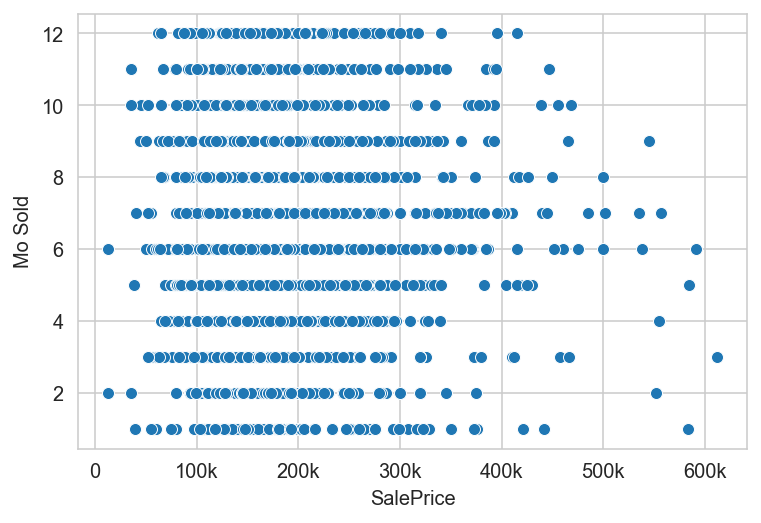

In [140]:
scatterplt(var='Mo Sold')

Based on the spread of datapoints for `Mo Sold`, I consider this feature to have low predictive value for `SalePrice`.

_No gross outliers._

#### `Yr Sold` distribution:

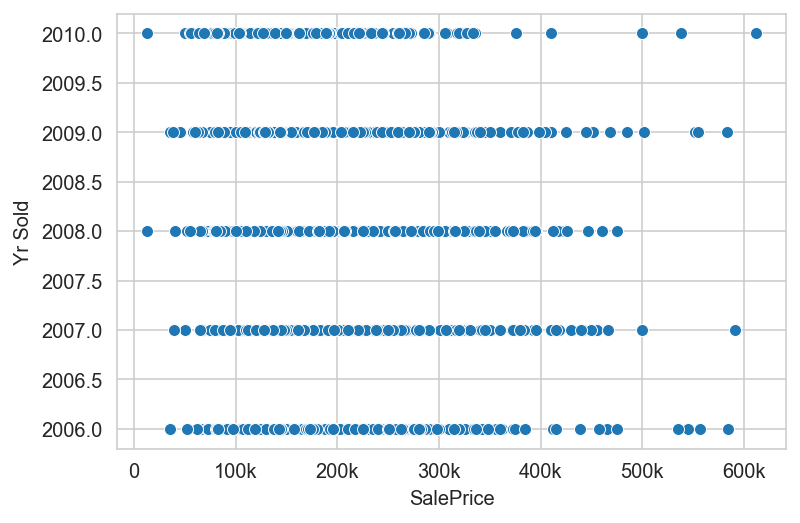

In [141]:
scatterplt(var='Yr Sold')

Based on the spread of datapoints for `Yr Sold`, I consider this feature to have low predictive value for `SalePrice`.

_No gross outliers._

#### `Sale Type` distribution:

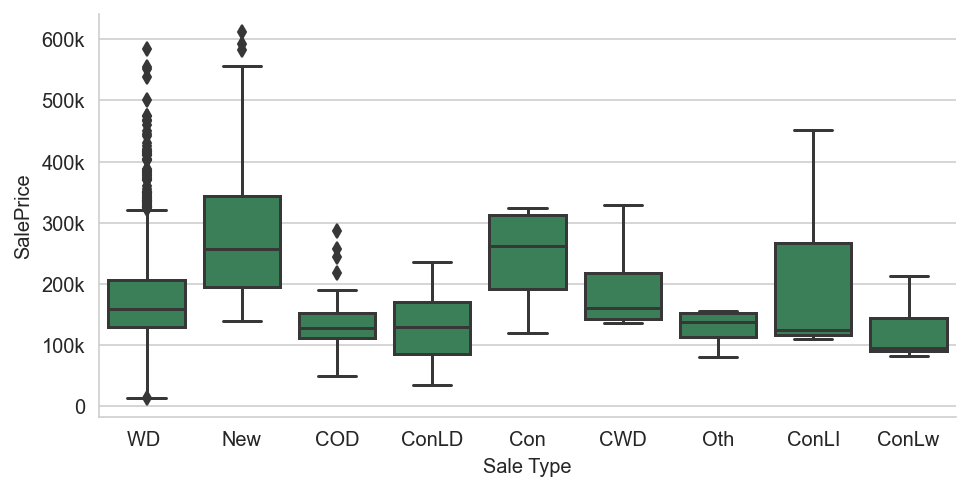

In [142]:
boxplt('Sale Type',hgt=3.5,asp=2)

Home just constructed and sold(New), Contract 15% Down payment regular terms(Con) and Warranty Deed - Conventional(WD)(outliers) `Sale Types` are associated with high `SalePrice`. No extreme outliers.

## Identifying outliers:
---

__**3 methods:**__
1. [Via Data Dictionary](#Via-data-dictionary-Special-Notes:)
1. [Via Plots](#Via-visual-identification-on-plots-conducted-in-EDA:)
1. [Via Interquartile range](#Via-IQR:) <details>
    * [(StatisticsbyJim)](https://statisticsbyjim.com/basics/interquartile-range/) 
    * [(Geekforgeeks)](https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/)</details>

##### Via [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) `Special Notes`:

>There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.

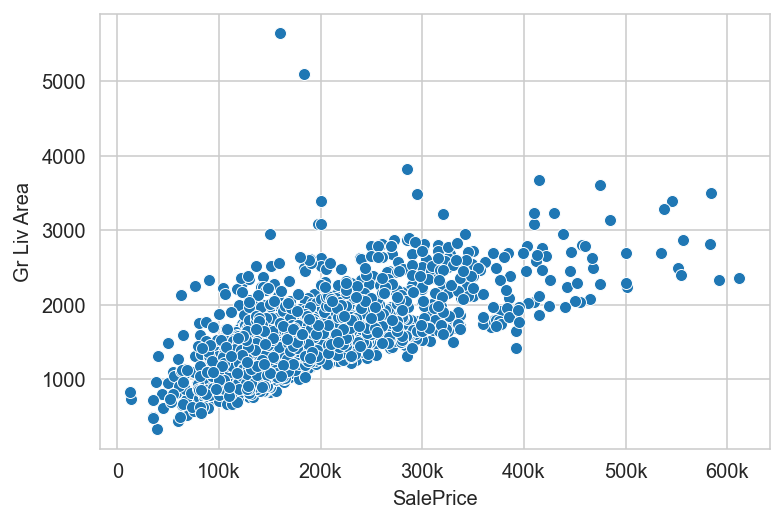

In [143]:
scatterplt('Gr Liv Area')

In [144]:
train_df.loc[train_df['Gr Liv Area']>4000, ['Gr Liv Area','SalePrice']]

Gr Liv Area  SalePrice
960          5642     160000
1885         5095     183850

It is not apparent from the scatterplot if the **3 true outliers**(Partial Sales) are in this train data set or in test data set. However, the 2 outliers that represent unusual sales of very large houses are apparent on the scatterplot. The observations were included in the `outlier_list` [below](#Via-visual-identification-on-scatterplots-conducted-in-EDA-below:).

##### Via visual identification on plots conducted in EDA:

In [145]:
outlier_list = [519,960,1335,471,694,1035,1141,1897,1939,1409,1885,770,1692,828,966,1304,
                    1389,487,1303,1523,685,1964,125,823,1780,761,1759,144,1058,1164,183,1647]

In [146]:
len(outlier_list)

32

Based on visual identification from plots, there are 32 extreme outliers.

##### Via IQR:

In [147]:
# construct quantile table
train_qtiles = train_df.quantile(q=[0.25,0.75]).T
train_qtiles.head()

0.25         0.75
Id                  753.5       2198.0
PID           528458140.0  907180080.0
MS SubClass          20.0         70.0
Lot Frontage         58.0         80.0
Lot Area           7500.0      11513.5

In [148]:
# construct column for IQR
train_qtiles['IQR'] = train_qtiles[0.75] - train_qtiles[0.25]

In [149]:
# construct columns for lowest and highest values within IQR
train_qtiles['low'] = train_qtiles[0.25] - (1.5*train_qtiles['IQR'])
train_qtiles['high'] = train_qtiles[0.75] + (1.5*train_qtiles['IQR'])

In [150]:
# check quantile table
train_qtiles.head()

0.25         0.75          IQR          low          high
Id                  753.5       2198.0       1444.5     -1413.25  4.364750e+03
PID           528458140.0  907180080.0  378721940.0 -39624770.00  1.475263e+09
MS SubClass          20.0         70.0         50.0       -55.00  1.450000e+02
Lot Frontage         58.0         80.0         22.0        25.00  1.130000e+02
Lot Area           7500.0      11513.5       4013.5      1479.75  1.753375e+04

In [151]:
# function to distill the indices of outlying datapoints based on IQR equation
def outliers(q_df, data):
    lst = []
    for col in data.select_dtypes(include=np.number).columns.tolist():
        if col=='Id' or col=='PID' or col=='MS SubClass' \
        or col=='Overall Cond' or col=='Overall Qual' \
        or col=='SalePrice':
            pass
        else:
            lowest = q_df.loc[col,'low']
            highest = q_df.loc[col,'high']
            low_lst = list(data.index[data[col]<lowest].values)
            high_lst = list(data.index[data[col]>highest].values)
            lst += low_lst + high_lst
            # print(f'Feature: {col}')
            # print(f'Low outliers: {low_lst}')
            # print(f'High outliers: {high_lst}')
            # print()
    return set(lst)

In [152]:
# there are 1160 outliers based on IQR
len(outliers(train_qtiles, train_df))

1160

In [153]:
# number of columns in source data
len(train_df.columns.tolist())

81

In [154]:
# number of numerical features
len(train_df.select_dtypes(include='number').T)

39

Using interquartile range to identify outliers in numerical features for this data set is not useful because this data contains more than 75 features, and about half (39) are numerical features. The number of outliers identified via IQR is 1160, which is a huge proportion of `train_df`.  So at this stage, I decided not to remove outliers identified by IQR, but by visual identification on plots done [below](#train_df1).

## Feature engineering:
---

##### Functions for label encoding presence/absence of attribute:

In [155]:
def yes_no_col(df,root,new,var_no):
    conditions = [
        (df[root]=='Ex') | (df[root]=='Gd')|
        (df[root]=='TA') | (df[root]=='Fa')|
        (df[root]=='Po'), 
        (df[root]==var_no)
    ]
    values = [1, 0]
    df[new] = np.select(conditions, values)

In [156]:
def yes_no_pool(df,root,new):
    conditions = [
        (df[root]=='Ex') | (df[root]=='Gd')|
        (df[root]=='TA') | (df[root]=='Fa'), 
        (df[root]=='No pool')
    ]
    values = [1, 0]
    df[new] = np.select(conditions, values)

In [157]:
def yes_no_fence(df,root,new):
    conditions = [
        (df[root]=='GdPrv') | (df[root]=='MnPrv')|
        (df[root]=='GdWo') | (df[root]=='MnWw'), 
        (df[root]=='No fence')
    ]
    values = [1, 0]
    df[new] = np.select(conditions, values)

_**Calling functions to feature engineer:**_

In [158]:
yes_no_col(train_df,root='Bsmt Cond',new='have_bsmt',var_no='No basement')
yes_no_col(train_df,root='Fireplace Qu',new='have_fireplace',var_no='No fireplace')
yes_no_col(train_df,root='Garage Cond',new='have_garage',var_no='No garage')
yes_no_pool(train_df,root='Pool QC',new='have_pool')
yes_no_fence(train_df,root='Fence',new='have_fence')

_**Checking that function performed as desired:**_

In [159]:
train_df.groupby('have_bsmt')['Bsmt Cond'].value_counts(dropna=False)

have_bsmt  Bsmt Cond  
0          No basement      55
1          TA             1834
           Gd               89
           Fa               65
           Po                5
           Ex                3
Name: Bsmt Cond, dtype: int64

In [160]:
train_df.groupby('have_fireplace')['Fireplace Qu'].value_counts(dropna=False)

have_fireplace  Fireplace Qu
0               No fireplace    1000
1               Gd               523
                TA               407
                Fa                59
                Ex                31
                Po                31
Name: Fireplace Qu, dtype: int64

In [161]:
train_df.groupby('have_garage')['Garage Cond'].value_counts(dropna=False)

have_garage  Garage Cond
0            No garage       114
1            TA             1868
             Fa               47
             Gd               12
             Po                8
             Ex                2
Name: Garage Cond, dtype: int64

In [162]:
train_df.groupby('have_pool')['Pool QC'].value_counts(dropna=False)

have_pool  Pool QC
0          No pool    2042
1          Gd            4
           Fa            2
           TA            2
           Ex            1
Name: Pool QC, dtype: int64

In [163]:
train_df.groupby('have_fence')['Fence'].value_counts(dropna=False)

have_fence  Fence   
0           No fence    1651
1           MnPrv        227
            GdPrv         83
            GdWo          80
            MnWw          10
Name: Fence, dtype: int64

##### Functions for ordinal label encoding of attributes:

In [164]:
def int_rank1(df,col):
    return df[col].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace=True)

In [165]:
def int_rank2(df,col,var_no):
    return df[col].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, var_no:0}, inplace=True)

In [166]:
def int_rank3(df,col,var_no):
    return df[col].replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, var_no:0}, inplace=True)

In [167]:
# check original count
train_df['Exter Qual'].value_counts(dropna=False) 

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [168]:
# call function
int_rank1(train_df, col='Exter Qual')
int_rank1(train_df, col='Exter Cond')
int_rank1(train_df, col='Heating QC')
int_rank1(train_df, col='Kitchen Qual')

In [169]:
# check function return
train_df['Exter Qual'].value_counts(dropna=False)

3    1247
4     697
5      81
2      26
Name: Exter Qual, dtype: int64

In [170]:
# check original count
train_df['Bsmt Qual'].value_counts(dropna=False)

TA             887
Gd             864
Ex             184
Fa              60
No basement     55
Po               1
Name: Bsmt Qual, dtype: int64

_**Call function:**_

In [171]:
int_rank2(train_df,col='Bsmt Qual',var_no='No basement')
int_rank2(train_df,col='Bsmt Cond',var_no='No basement')
int_rank2(train_df,col='Fireplace Qu',var_no='No fireplace')
int_rank2(train_df,col='Garage Qual',var_no='No garage')
int_rank2(train_df,col='Garage Cond',var_no='No garage')

In [172]:
# check function return
train_df['Bsmt Qual'].value_counts(dropna=False)

3    887
4    864
5    184
2     60
0     55
1      1
Name: Bsmt Qual, dtype: int64

In [173]:
# original count
train_df['BsmtFin Type 1'].value_counts(dropna=False)

GLQ            615
Unf            603
ALQ            293
BLQ            200
Rec            183
LwQ            102
No basement     55
Name: BsmtFin Type 1, dtype: int64

_**Call function:**_

In [174]:
int_rank3(train_df,col='BsmtFin Type 1',var_no='No basement')
int_rank3(train_df,col='BsmtFin Type 2',var_no='No basement')

In [175]:
# check function return
train_df['BsmtFin Type 1'].value_counts(dropna=False)

6    615
1    603
5    293
4    200
3    183
2    102
0     55
Name: BsmtFin Type 1, dtype: int64

In [176]:
# original count
train_df['Bsmt Exposure'].value_counts(dropna=False)

No             1339
Av              288
Gd              203
Mn              163
No basement      58
Name: Bsmt Exposure, dtype: int64

In [177]:
# more replacement of ordinal categorical values with numerical values
train_df['Lot Shape'].replace({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1}, inplace=True)
train_df['Utilities'].replace({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}, inplace=True)
train_df['Land Slope'].replace({'Gtl':3, 'Mod':2, 'Sev':1}, inplace=True)
train_df['Bsmt Exposure'].replace({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'No basement':0}, inplace=True)
train_df['Heating QC'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace=True)
train_df['Central Air'].replace({'Y':1, 'N':0}, inplace=True)
train_df['Functional'].replace({'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}, inplace=True)  
train_df['Garage Finish'].replace({'Fin':3, 'RFn':2, 'Unf':1, 'No garage':0}, inplace=True)
train_df['Electrical'].replace({'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1}, inplace=True)
train_df['Pool QC'].replace({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'No pool':0}, inplace=True)
train_df['Paved Drive'].replace({'Y':3, 'P':2, 'N':1}, inplace=True)
train_df['Fence'].replace({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'No fence':0}, inplace=True)

In [178]:
# check change
train_df['Bsmt Exposure'].value_counts(dropna=False)

1    1339
3     288
4     203
2     163
0      58
Name: Bsmt Exposure, dtype: int64

In [179]:
# check what features left that have values still in string form
train_df.dtypes[train_df.dtypes=='object']

MS Zoning       object
Street          object
Alley           object
Land Contour    object
Lot Config      object
Neighborhood    object
Condition 1     object
Condition 2     object
Bldg Type       object
House Style     object
Roof Style      object
Roof Matl       object
Exterior 1st    object
Exterior 2nd    object
Mas Vnr Type    object
Foundation      object
Heating         object
Garage Type     object
Misc Feature    object
Sale Type       object
dtype: object

In the following categorical features, I group values based on the similar properties that they might share and by count of values. E.g. `level` or `unlevel`.

##### Value count and grouping values in categorical features:

In [180]:
def val_cnt(feature):
    return train_df[[feature]].value_counts(dropna=False)

In [181]:
val_cnt(feature='MS Zoning')

MS Zoning
RL           1598
RM            316
FV            101
C (all)        19
RH             14
A (agr)         2
I (all)         1
dtype: int64

In [182]:
# reduce categorical values by grouping
train_df['MS Zoning'].replace({'RM':'R_others', 'RH':'R_others', 
                              'FV': 'others', 'C (all)':'others', 
                               'A (agr)':'others', 'I (all)':'others'
                              }, inplace=True)
# check changes
val_cnt(feature='MS Zoning')

MS Zoning
RL           1598
R_others      330
others        123
dtype: int64

In [183]:
val_cnt(feature='Street')

Street
Pave      2044
Grvl         7
dtype: int64

In [184]:
val_cnt(feature='Alley')

Alley   
No alley    1911
Grvl          85
Pave          55
dtype: int64

In [185]:
# reduce categorical values by grouping
train_df['Alley'].replace({'No alley':0, 'Grvl':1, 'Pave':1   
                              }, inplace=True)
# check changes
val_cnt(feature='Alley')

Alley
0        1911
1         140
dtype: int64

In [186]:
val_cnt(feature='Land Contour')

Land Contour
Lvl             1843
HLS               85
Bnk               80
Low               43
dtype: int64

In [187]:
# reduce categorical values by grouping
train_df['Land Contour'].replace({'HLS': 'unLvl', 'Bnk':'unLvl', 'Low':'unLvl'   
                              }, inplace=True)
# check changes
val_cnt(feature='Land Contour')

Land Contour
Lvl             1843
unLvl            208
dtype: int64

In [188]:
val_cnt(feature='Lot Config')

Lot Config
Inside        1503
Corner         348
CulDSac        131
FR2             60
FR3              9
dtype: int64

In [189]:
# reduce categorical values by grouping
train_df['Lot Config'].replace({'CulDSac':'others', 'FR2':'others', 'FR3':'others'
                              }, inplace=True)
# check changes
val_cnt(feature='Lot Config')

Lot Config
Inside        1503
Corner         348
others         200
dtype: int64

In [190]:
val_cnt(feature='Neighborhood')

Neighborhood
NAmes           310
CollgCr         180
OldTown         163
Edwards         143
Somerst         130
NridgHt         122
Gilbert         116
Sawyer          111
SawyerW          87
NWAmes           87
Mitchel          82
BrkSide          76
Crawfor          71
IDOTRR           69
Timber           48
NoRidge          48
StoneBr          38
SWISU            32
ClearCr          27
MeadowV          24
Blmngtn          22
BrDale           19
NPkVill          17
Veenker          17
Blueste           6
Greens            3
GrnHill           2
Landmrk           1
dtype: int64

In [191]:
# reduce categorical values by group by zip codes
'''
50014: Bluestem;  Clear Creek; College Creek; edwards; north ames, sawyer west, 
       gilbert, timberland, greens, greenhil
50010: Bloomington heights; Briardale; Brookside; Crawford;  DOT, Meadow village, 
       northridge, northpark villa, northridge heights, northwest ames, 
       old town, sawyer , stone brooke, mitchell, somerset, 
50011: iowa state university, veenker, landmark
'''
train_df['Neighborhood'].replace({'Blmngtn':'pc_50010', 'Blueste':'pc_50014', 'BrDale':'pc_50010',
                                  'BrkSide':'pc_50010', 'ClearCr':'pc_50014', 'CollgCr':'pc_50014',
                                  'Crawfor':'pc_50010', 'Edwards':'pc_50014', 'Gilbert':'pc_50014',
                                  'IDOTRR': 'pc_50010', 'MeadowV': 'pc_50010', 'Mitchel':'pc_50010',
                                  'NAmes':'pc_50014', 'NoRidge':'pc_50010', 'NPkVill':'pc_50010',
                                  'NridgHt':'pc_50010', 'NWAmes':'pc_50010', 'OldTown':'pc_50010',
                                  'SWISU':'pc_50011', 'Sawyer':'pc_50010', 'SawyerW':'pc_50014',
                                  'Somerst':'pc_50010', 'StoneBr':'pc_50010', 'Timber':'pc_50014',
                                  'Veenker':'pc_50011', 'Greens':'pc_50014', 'GrnHill':'pc_50014',
                                  'Landmrk':'pc_50011'
                              }, inplace=True)
# check changes
val_cnt(feature='Neighborhood')

Neighborhood
pc_50010        1079
pc_50014         922
pc_50011          50
dtype: int64

In [192]:
val_cnt(feature='Condition 1')

Condition 1
Norm           1767
Feedr           109
Artery           70
RRAn             36
PosN             27
RRAe             21
PosA             12
RRNn              6
RRNe              3
dtype: int64

In [193]:
# reduce categorical values by grouping
train_df['Condition 1'].replace({'Feedr':'street', 'Artery':'street', 'RRAn':'rail',
                                 'PosN':'feature', 'RRAe':'rail', 'PosA':'feature',
                                 'RRNn':'rail', 'RRNe':'rail'
                              }, inplace=True)
# check changes
val_cnt(feature='Condition 1')

Condition 1
Norm           1767
street          179
rail             66
feature          39
dtype: int64

In [194]:
val_cnt(feature='Condition 2')

Condition 2
Norm           2025
Feedr            11
Artery            5
PosA              3
PosN              3
RRNn              2
RRAe              1
RRAn              1
dtype: int64

In [195]:
# reduce categorical values by grouping
train_df['Condition 2'].replace({'Feedr':'other', 'Artery':'other', 'RRAn':'other',
                                 'PosN':'other', 'RRAe':'other', 'PosA':'other',
                                 'RRNn':'other', 
                              }, inplace=True)
# check changes
val_cnt(feature='Condition 2')

Condition 2
Norm           2025
other            26
dtype: int64

In [196]:
val_cnt(feature='Bldg Type')

Bldg Type
1Fam         1700
TwnhsE        161
Duplex         75
Twnhs          69
2fmCon         46
dtype: int64

In [197]:
# reduce categorical values by grouping
train_df['Bldg Type'].replace({'1Fam':'fam', 'TwnhsE':'twnhs', 'Twnhs':'twnhs',
                                 '2fmCon':'fam'
                              }, inplace=True)
# check changes
val_cnt(feature='Bldg Type')

Bldg Type
fam          1746
twnhs         230
Duplex         75
dtype: int64

In [198]:
val_cnt(feature='House Style')

House Style
1Story         1059
2Story          598
1.5Fin          218
SLvl             94
SFoyer           50
2.5Unf           14
1.5Unf           12
2.5Fin            6
dtype: int64

In [199]:
# reduce categorical values by grouping
train_df['House Style'].replace({'1Story':'1story', '2Story':'2story', '1.5Fin':'1story',
                                 'SLvl':'split', 'SFoyer':'split', '2.5Unf':'2story',
                                 '1.5Unf':'1story', '2.5Fin':'2story'
                              }, inplace=True)
# check changes
val_cnt(feature='House Style')

House Style
1story         1289
2story          618
split           144
dtype: int64

In [200]:
val_cnt(feature='Roof Style')

Roof Style
Gable         1619
Hip            397
Flat            13
Gambrel         12
Mansard          7
Shed             3
dtype: int64

In [201]:
# reduce categorical values by grouping
train_df['Roof Style'].replace({'Hip':'other', 'Flat':'other', 'Gambrel':'other',
                                 'Mansard':'other', 'Shed':'other'
                              }, inplace=True)
# check changes
val_cnt(feature='Roof Style')

Roof Style
Gable         1619
other          432
dtype: int64

In [202]:
val_cnt(feature='Roof Matl')

Roof Matl
CompShg      2025
Tar&Grv        15
WdShngl         5
WdShake         4
ClyTile         1
Membran         1
dtype: int64

In [203]:
# reduce categorical values by grouping
train_df['Roof Matl'].replace({'Tar&Grv':'other', 'WdShngl':'other', 'WdShake':'other',
                                 'ClyTile':'other', 'Membran':'other'
                              }, inplace=True)
# check changes
val_cnt(feature='Roof Matl')

Roof Matl
CompShg      2025
other          26
dtype: int64

In [204]:
val_cnt(feature='Exterior 1st')

Exterior 1st
VinylSd         724
MetalSd         331
HdBoard         300
Wd Sdng         276
Plywood         152
CemntBd          90
BrkFace          64
WdShing          45
AsbShng          33
Stucco           27
BrkComm           3
CBlock            2
Stone             2
AsphShn           1
ImStucc           1
dtype: int64

In [205]:
# reduce categorical values by grouping
'''
vinyl, wood, metal, cement, stone, other
'''
train_df['Exterior 1st'].replace({'HdBoard':'wood', 'Wd Sdng':'wood', 'Plywood':'wood',
                                 'CemntBd':'cement', 'BrkFace':'other', 'WdShing':'wood',
                                 'AsbShng':'other', 'Stucco': 'cement', 'BrkComm':'other',
                                  'CBlock':'cement', 'AsphShn':'other', 'ImStucc':'other', 
                                  'Stone':'other'
                              }, inplace=True)
# check changes
val_cnt(feature='Exterior 1st')

Exterior 1st
wood            773
VinylSd         724
MetalSd         331
cement          119
other           104
dtype: int64

In [206]:
val_cnt(feature='Exterior 2nd')

Exterior 2nd
VinylSd         721
MetalSd         324
HdBoard         275
Wd Sdng         262
Plywood         185
CmentBd          90
Wd Shng          63
BrkFace          34
Stucco           30
AsbShng          28
Brk Cmn          17
ImStucc          11
Stone             6
AsphShn           3
CBlock            2
dtype: int64

In [207]:
# reduce categorical values by grouping
'''
vinyl, wood, metal, cement, stone, other
'''
train_df['Exterior 2nd'].replace({'HdBoard':'wood', 'Wd Sdng':'wood', 'Plywood':'wood',
                                 'CmentBd':'cement', 'BrkFace':'other', 'Wd Shng':'wood',
                                 'AsbShng':'other', 'Stucco': 'cement', 'Brk Cmn':'other',
                                  'CBlock':'cement', 'AsphShn':'other', 'ImStucc':'other', 
                                  'Stone':'other'
                              }, inplace=True)
# check changes
val_cnt(feature='Exterior 2nd')

Exterior 2nd
wood            785
VinylSd         721
MetalSd         324
cement          122
other            99
dtype: int64

In [208]:
val_cnt(feature='Mas Vnr Type')

Mas Vnr Type
None            1218
BrkFace          630
Stone            168
NaN               22
BrkCmn            13
dtype: int64

In [209]:
# reduce categorical values by grouping
'''
none, stone, brick
'''
train_df['Mas Vnr Type'].replace({'BrkFace':'brick', 'BrkCmn':'brick', np.nan:'None'  
                              }, inplace=True)
# check changes
val_cnt(feature='Mas Vnr Type')

Mas Vnr Type
None            1240
brick            643
Stone            168
dtype: int64

In [210]:
val_cnt(feature='Foundation')

Foundation
PConc         926
CBlock        863
BrkTil        221
Slab           34
Stone           5
Wood            2
dtype: int64

In [211]:
# reduce categorical values by grouping
train_df['Foundation'].replace({'BrkTil':'other', 'Slab':'other', 'Stone':'other', 
                                'Wood':'other'
                              }, inplace=True)
# check changes
val_cnt(feature='Foundation')

Foundation
PConc         926
CBlock        863
other         262
dtype: int64

In [212]:
val_cnt(feature='Heating')

Heating
GasA       2018
GasW         20
Wall          6
Grav          5
OthW          2
dtype: int64

In [213]:
# reduce categorical values by grouping
train_df['Heating'].replace({'GasW':'other', 'Wall':'other', 'Grav':'other',
                             'OthW':'other'
                              }, inplace=True)
# check changes
val_cnt(feature='Heating')

Heating
GasA       2018
other        33
dtype: int64

In [214]:
val_cnt(feature='Garage Type')

Garage Type
Attchd         1213
Detchd          536
BuiltIn         132
NaN             113
Basment          27
2Types           19
CarPort          11
dtype: int64

In [215]:
# reduce categorical values by grouping
'''
others, attached, detached,
'''
train_df['Garage Type'].replace({'BuiltIn':'Attchd', 'Basment':'Attchd', np.nan:'other',
                                 '2Types':'other','CarPort':'Detchd'
                              }, inplace=True)
# check changes
val_cnt(feature='Garage Type')

Garage Type
Attchd         1372
Detchd          547
other           132
dtype: int64

In [216]:
val_cnt(feature='Misc Feature')

Misc Feature
None            1986
Shed              56
Gar2               4
Othr               3
Elev               1
TenC               1
dtype: int64

In [217]:
# reduce categorical values by grouping
train_df['Misc Feature'].replace({'None':0, 'Shed':1, 'Gar2':1, 
                           'Othr':1, 'Elev':1, 'TenC':1
                              }, inplace=True)
# check changes
val_cnt(feature='Misc Feature')

Misc Feature
0               1986
1                 65
dtype: int64

In [218]:
val_cnt(feature='Sale Type')

Sale Type
WD           1781
New           160
COD            63
ConLD          17
CWD            10
ConLI           7
ConLw           5
Con             4
Oth             4
dtype: int64

In [219]:
# reduce categorical values by grouping
train_df['Sale Type'].replace({'New':'Oth', 'COD':'Oth', 'ConLD':'Con', 
                               'CWD':'WD', 'ConLI':'Con', 'ConLw':'Con',
                               'WD ':'WD'
                              }, inplace=True)
# check changes
val_cnt(feature='Sale Type')

Sale Type
WD           1791
Oth           227
Con            33
dtype: int64

In [220]:
# check what features left that have values still in string form
train_df.dtypes[train_df.dtypes=='object']

MS Zoning       object
Street          object
Land Contour    object
Lot Config      object
Neighborhood    object
Condition 1     object
Condition 2     object
Bldg Type       object
House Style     object
Roof Style      object
Roof Matl       object
Exterior 1st    object
Exterior 2nd    object
Mas Vnr Type    object
Foundation      object
Heating         object
Garage Type     object
Sale Type       object
dtype: object

### train_dum

In [221]:
prefix_dict = {'MS Zoning': 'msz','Street': 'st','Land Contour': 'ld_c','Lot Config': 'lt_c',
               'Neighborhood': 'nbrhd', 'Condition 1': 'cdn_1','Condition 2': 'cdn_2',
               'Bldg Type': 'bdg_t','House Style': 'hse_s','Roof Style': 'rf_s',
               'Roof Matl': 'rf_m','Exterior 1st': 'ex_1', 'Exterior 2nd': 'ex_2',
               'Mas Vnr Type': 'mvt', 'Foundation': 'fdn','Heating': 'htg', 
               'Garage Type': 'grge_t', 'Sale Type': 'sle_t'    
              }

columns_list = ['MS Zoning','Street','Land Contour','Lot Config','Neighborhood',
                'Condition 1','Condition 2','Bldg Type','House Style','Roof Style',
                'Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type',
                'Foundation','Heating','Garage Type','Sale Type'
               ]

train_dum = pd.get_dummies(data=train_df, prefix=prefix_dict, dummy_na=True, columns=columns_list)
train_dum.head(3)

Id        PID  MS SubClass  Lot Frontage  Lot Area  Alley  Lot Shape  \
0  109  533352170           60           NaN     13517      0          3   
1  544  531379050           60          43.0     11492      0          3   
2  153  535304180           20          68.0      7922      0          4   

   Utilities  Land Slope  Overall Qual  ...  htg_other  htg_nan  \
0          4           3             6  ...          0        0   
1          4           3             7  ...          0        0   
2          4           3             5  ...          0        0   

   grge_t_Attchd  grge_t_Detchd  grge_t_other  grge_t_nan  sle_t_Con  \
0              1              0             0           0          0   
1              1              0             0           0          0   
2              0              1             0           0          0   

   sle_t_Oth  sle_t_WD  sle_t_nan  
0          0         1          0  
1          0         1          0  
2          0         1          0  

[3 rows x 139 columns]

In [222]:
# no features left that have values still in string form
train_dum.dtypes[train_dum.dtypes=='object']

Series([], dtype: object)

In [223]:
# relook at what null values that are left undummified
train_dum.isnull().sum().sort_values(ascending=False)[:12]

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Area       22
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Cars         1
Garage Area         1
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
BsmtFin SF 1        1
nbrhd_nan           0
dtype: int64

In [224]:
# percentage of null values in each column of dummified train data
(train_dum.isnull().sum().sort_values(ascending=False) * 100 / len(train_dum))[:12]

Lot Frontage      16.089712
Garage Yr Blt      5.558264
Mas Vnr Area       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Garage Cars        0.048757
Garage Area        0.048757
Total Bsmt SF      0.048757
Bsmt Unf SF        0.048757
BsmtFin SF 2       0.048757
BsmtFin SF 1       0.048757
nbrhd_nan          0.000000
dtype: float64

Now there are 2 features left with high percentage of null values (>5%).<br><br> 
For `Lot Frontage` feature, with percentage of null values at 16%, either I would remove the feature, or replace missing values by imputation using `KNN imputation`. However the imputation would only be done after train-test-split on the training set.<br><br>
For `Garage Yr Blt`, the missing values are Missing At Random values, since they seem to be dependent on the values of other `Garage`-related features. They also seem to correspond with properties that have **no garage**. Imputation will likely contribute false information, when these missing values have a reason to be missing. If I drop the rows with missing values in `Garage Yr Blt` feature, I would also lose the data of **no garage** from categorical features `Garage Finish`, `Garage Qual` and `Garage Cond`. So I decided the best course of action is to drop the `Garage Yr Blt` feature and retain the datapoints.<br><br>
As for the other features with percentage of null values at `<5%`, I would keep the feature but drop the rows with the missing values.

In [225]:
'''
Displaying that there is no clear relationship between
`Lot Frontage` feature and other `Lot`-related features
'''
train_df.loc[train_df['Lot Frontage'].isnull(), ['Lot Frontage','Lot Area','Lot Shape','Lot Config']].head(3)

Lot Frontage  Lot Area  Lot Shape Lot Config
0           NaN     13517          3     others
7           NaN     12160          3     Inside
8           NaN     15783          4     Inside

There is no discernable pattern or explanation as to why the values are missing for `Lot Frontage` feature. I wish to preserve this feature since this feature also has a high correlation with `SalePrice` (This will be revealed in `corr_03`). I would impute the missing values using `KNN imputation`after train-test-split. 

In [226]:
'''
Displaying `Garage Yr Blt` missing value relationship 
with other categorical `Garage`-related features
'''
train_df.loc[train_df['Garage Yr Blt'].isnull(), ['Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']].head(3)

Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  Garage Qual  \
28            NaN              0          0.0          0.0            0   
53            NaN              0          0.0          0.0            0   
65            NaN              0          0.0          0.0            0   

    Garage Cond  
28            0  
53            0  
65            0

_**Rows in features with <5% null values:**_

In [227]:
train_df.loc[train_df['Garage Cars'].isnull(), ['Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']]

Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  Garage Qual  \
1712            NaN              0          NaN          NaN            0   

      Garage Cond  
1712            0

In [228]:
train_df.loc[train_df['BsmtFin SF 2'].isnull(), ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']]

Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  \
1327          0          0              0               0           NaN   

      BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  
1327               0           NaN          NaN            NaN

In [229]:
train_df.loc[train_df['Bsmt Full Bath'].isnull(), ['Bsmt Full Bath','Bsmt Half Bath']]

Bsmt Full Bath  Bsmt Half Bath
616              NaN             NaN
1327             NaN             NaN

In [230]:
'''
these have blank spaces in the source data upon checking, 
the np.nan values have been grouped with 'other' values done above for feature `Mas Vnr Type`
So these are likely MCAR values. 
'''
train_df.loc[train_df['Mas Vnr Area'].isnull(), ['Mas Vnr Area','Mas Vnr Type']].head(3)

Mas Vnr Area Mas Vnr Type
22           NaN         None
41           NaN         None
86           NaN         None

To get the list of row indices to drop, I include row indices of null values in the `Garage Cars`, `Bsmt Full Bath` and `Mas Vnr Area` features. `BsmtFin SF 2` is not included because the affected row also shares null value in `Bsmt Full Bath`, so the affected row will already be included from `Bsmt Full Bath`.

In [231]:
list1 = train_df.index[train_df['Garage Cars'].isnull()].tolist()
list1

[1712]

In [232]:
list2 = train_df.index[train_df['Bsmt Full Bath'].isnull()].tolist()
list2

[616, 1327]

In [233]:
list3 = train_df.index[train_df['Mas Vnr Area'].isnull()].tolist()
list3[:5]

[22, 41, 86, 212, 276]

I joined the 3 lists together which may contain duplicate indices. Then converted to set, which would only keep unique values.

In [234]:
drop_list = list1 + list2 + list3
len(drop_list)

25

#### drop_set

In [235]:
drop_set = set(drop_list)
len(drop_set) # no duplicate indices

25

In [236]:
print(drop_set)

{1025, 913, 276, 1941, 22, 1430, 1815, 1306, 1434, 1820, 1699, 41, 939, 1327, 1712, 431, 451, 1606, 844, 591, 338, 212, 86, 1244, 616}


### train_drop

In [237]:
'''
created new dataframe variable just in case I needed 
the dataframe without any dropped rows and/or feature(s) to go back to
'''
train_drop = train_dum.drop(index=drop_set, columns=['Garage Yr Blt'])

In [238]:
# checking what null values that are left
train_drop.isnull().sum().sort_values(ascending=False)[:3]

Lot Frontage    324
Id                0
bdg_t_twnhs       0
dtype: int64

In [239]:
# percentage of null values that are left 
(train_drop.isnull().sum().sort_values(ascending=False) * 100 / len(train_drop))[:3]

Lot Frontage    15.992103
Id               0.000000
bdg_t_twnhs      0.000000
dtype: float64

#### Final dataframe before feeding to model:

Note there is `Lot Frontage` feature left for imputation after train-test-split.

In [240]:
print(drop_set.intersection(set(outlier_list))) 
# comparing with drop_set that involved dropping rows with multiple null values 

set()


These outliers are **not the same datapoints** with missing values that were dropped in `train_drop` data.

In [241]:
train_drop.shape

(2026, 138)

In [242]:
# drop outliers identified from scatterplots
train_df1 = train_drop.drop(index=outlier_list)

In [243]:
train_df1.shape

(1994, 138)

In [244]:
train_df1.to_csv('model_data.csv',index=False)